# Presentation figures

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

raw_data_path = './Raw Data/'

def load_data(data_path = raw_data_path):
    data = pd.DataFrame()
    print('Loading data from ' + data_path)
    for folder in os.listdir(data_path):
        counter = 0
        for file in os.listdir(data_path + folder):
            if file.endswith('.csv'):
                tmp = pd.read_csv(data_path + folder + '/' + file)
                tmp['Time Stamp'] = tmp['Time Stamp'] // 1000
                tmp['power_wattage'] = tmp['power_wattage'] / 1000
                tmp['cpu_frequency_GHz'] = tmp['cpu_frequency_MHz'] / 1000
                tmp['gpu_frequency_GHz'] = tmp['gpu_frequency_MHz'] / 1000
                tmp['mem_frequency_GHz'] = tmp['mem_frequency_MHz'] / 1000
                tmp['app'] = folder
                tmp['run'] = counter
                counter += 1
                data = pd.concat([data, tmp])
    return data

df = load_data()
df

Loading data from ./Raw Data/


Time Stamp  available_memory_MB  app_pss_MB  battery_level_percentage  \
0              0                 2734         490                        56   
1              1                 2734         490                        56   
2              2                 2734         490                        56   
3              3                 2734         490                        56   
4              4                 2734         490                        56   
...          ...                  ...         ...                       ...   
1810        1811                  995        2334                        51   
1811        1812                  995        2334                        51   
1812        1813                  995        2334                        51   
1813        1814                  995        2334                        51   
1814        1814                  995        2334                        51   

      battery_temperature_celcius  battery_current_now_milliamps  \
0                              36                           9999   
1                              36                           9999   
2                              36                           9999   
3                              36                           9999   
4                              36                           9999   
...                           ...                            ...   
1810                           45                           9999   
1811                           45                           9999   
1812                           45                           9999   
1813                           45                           9999   
1814                           45                           9999   

      sensor_temperature_celcius  power_current  power_level_state  \
0                              0           1043                  0   
1                              0           1022                  0   
2                              0           1057                  0   
3                              0           1092                  0   
4                              0           1073                  0   
...                          ...            ...                ...   
1810                           0           1500                  0   
1811                           0           1500                  0   
1812                           0           1500                  0   
1813                           0           1500                  0   
1814                           0           1500                  0   

      power_voltage  ...  percent_texture_anisotropic_filtered  \
0              3752  ...                                     0   
1              3752  ...                                     0   
2              3752  ...                                     0   
3              3775  ...                                     0   
4              3775  ...                                     0   
...             ...  ...                                   ...   
1810           3703  ...                                     0   
1811           3703  ...                                     0   
1812           3703  ...                                     0   
1813           3703  ...                                     0   
1814           3718  ...                                     0   

      vrshell_average_frame_rate  vrshell_gpu_time_microseconds  \
0                             73                              0   
1                             73                              0   
2                             72                              0   
3                             72                              0   
4                             72                              0   
...                          ...                            ...   
1810                           0                              0   
1811                           0                              0   
181

In [76]:
plt.rcParams['font.family'] = 'Arial'
custom_params = {"axes.spines.right": False, 
                 "axes.spines.top": False,
                 "axes.spines.left": True,
                 "axes.spines.bottom": True,
                 "xtick.bottom": True,
                 "ytick.left": True,
                 "axes.edgecolor": "black",
                 "axes.grid": True,
                 "axes.linewidth": 1.5, 
                 "axes.facecolor": "white", 
                 "grid.color": "lightgray"}

custom_mean = {"marker":"d",
                "markerfacecolor":"white", 
                "markeredgecolor":"black",
                "markersize":"7"}

custom_outliers = {'marker': 'o', 
                   'markerfacecolor': 'grey'}

sns.set_theme(style='whitegrid', rc=custom_params, font_scale=1.5)

In [ ]:

def boxplot(data, datapoint, app, title):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    sns.boxplot(x=datapoint, y=app, data=data, showmeans=True, meanprops=custom_mean, flierprops=custom_outliers, palette='colorblind', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(datapoint)
    ax.set_ylabel(app)
    ax.set_xlim(0, 8)
    plt.show()

def lineplot(data, datapoint1, datapoint2, app, title, ylim_top=8):
    fig, ax = plt.subplots(1, 3, figsize=(18, 3))
    for i in range(3):
        sns.lineplot(data=data[data['run'] == i], x='Time Stamp', y=datapoint1, palette='colorblind', ax=ax[i], color='green', alpha=0.5)
        ax[i].set_title(title)
        ax[i].set_xlabel('Timestamp')
        ax[i].set_ylabel(datapoint1)
        ax[i].set_ylim(0, 8)
        ax2 = ax[i].twinx()
        sns.lineplot(data=data[data['run'] == i], x='Time Stamp', y=datapoint2, palette='colorblind', ax=ax2, color='red', alpha=0.5)
        ax2.set_ylim(0, ylim_top)
        if i < 2: # <-- Only turn off the ticks for the first two subplots
            ax2.set_ylabel(None)
        if i > 0:
            ax[i].set_ylabel(None)
    plt.show()

gaming = ['Basketball', 'Gorilla Tag', 'Blaston']
entertainment = ['Innerworld', 'ShapesXR', 'Zoe']
education = ['RecRoom', 'VRPlayer', 'Ultimechs']

boxplot(df[df['app'].isin(gaming)], 'power_wattage', 'app', 'Gaming Wattage')
boxplot(df[df['app'].isin(entertainment)], 'power_wattage', 'app', 'Entertainment Wattage')
boxplot(df[df['app'].isin(education)], 'power_wattage', 'app', 'Education Wattage')
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'cpu_frequency_GHz', app, app + ' Wattage vs CPU Frequency', 4)
# lineplot(df[df['app'] == 'Basketball'], 'power_wattage', 'Basketball', 'Basketball Wattage')

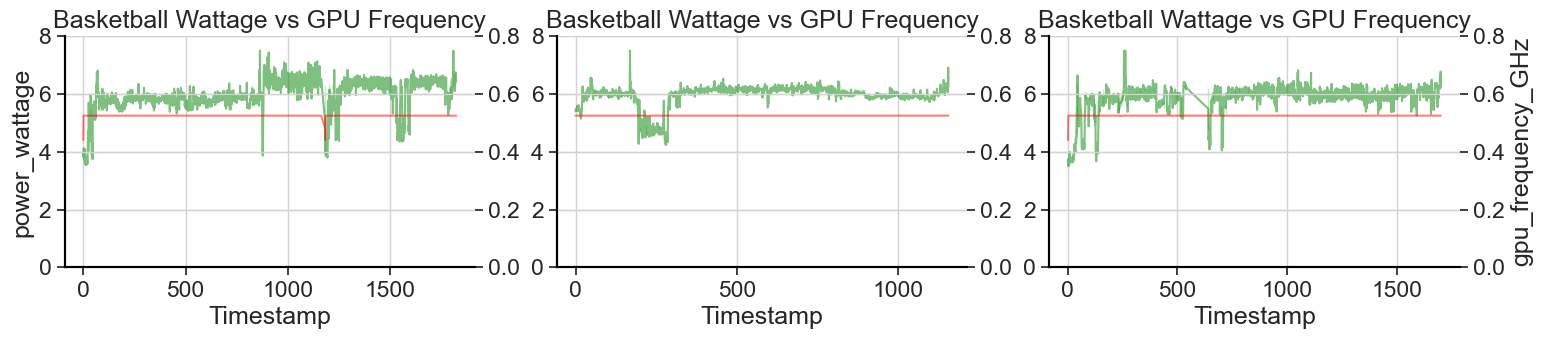

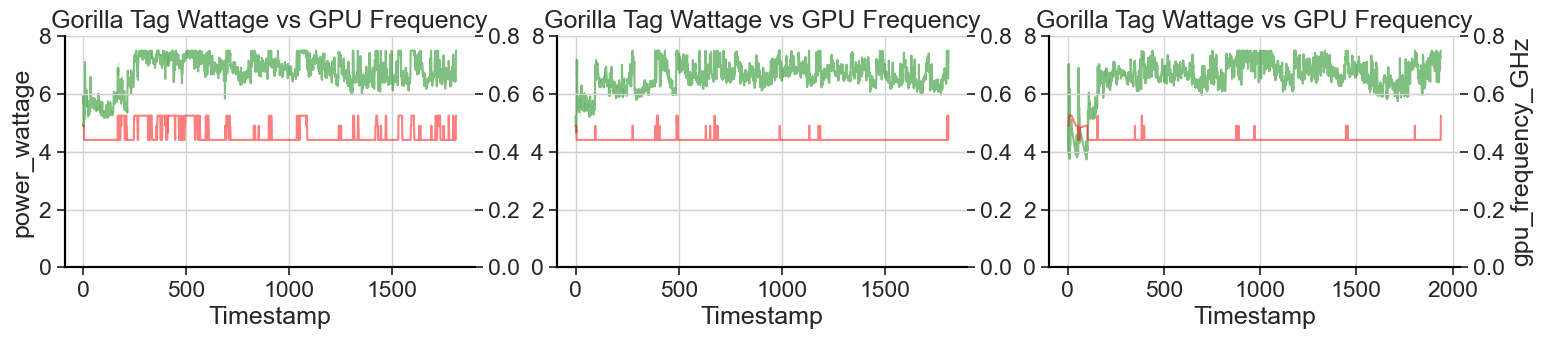

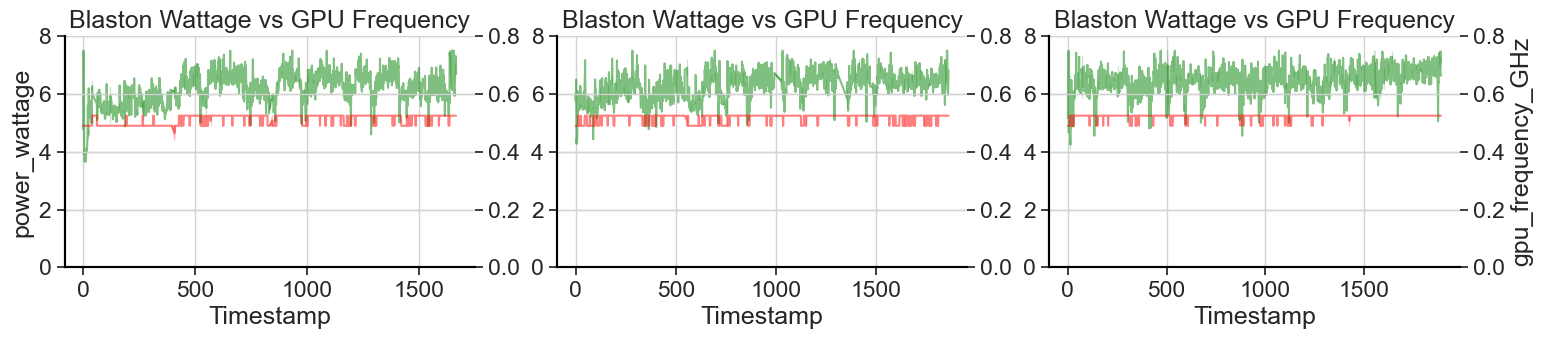

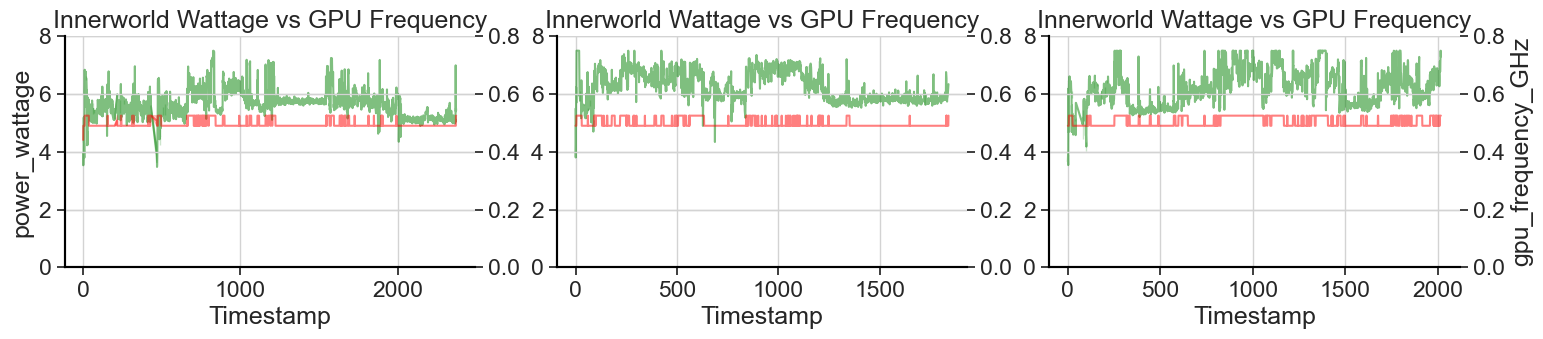

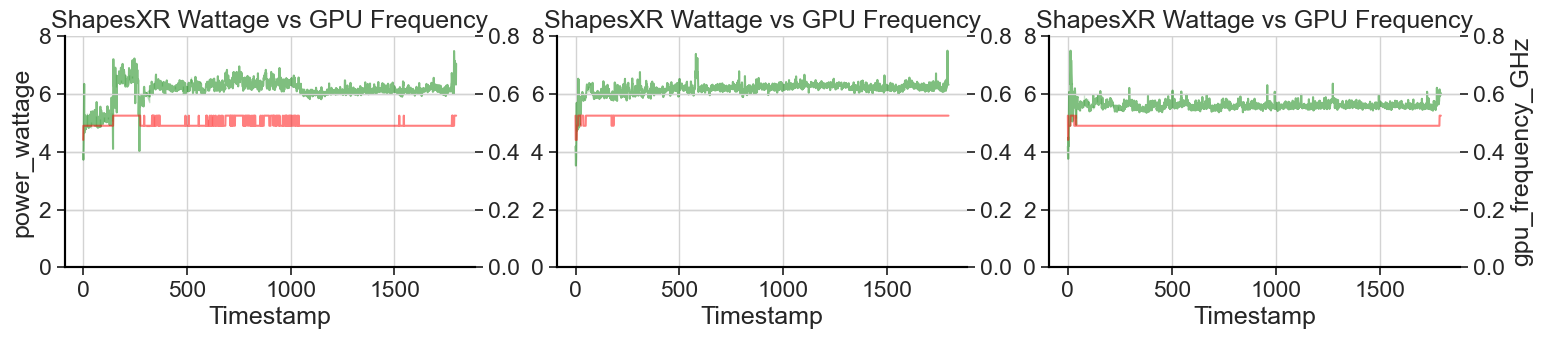

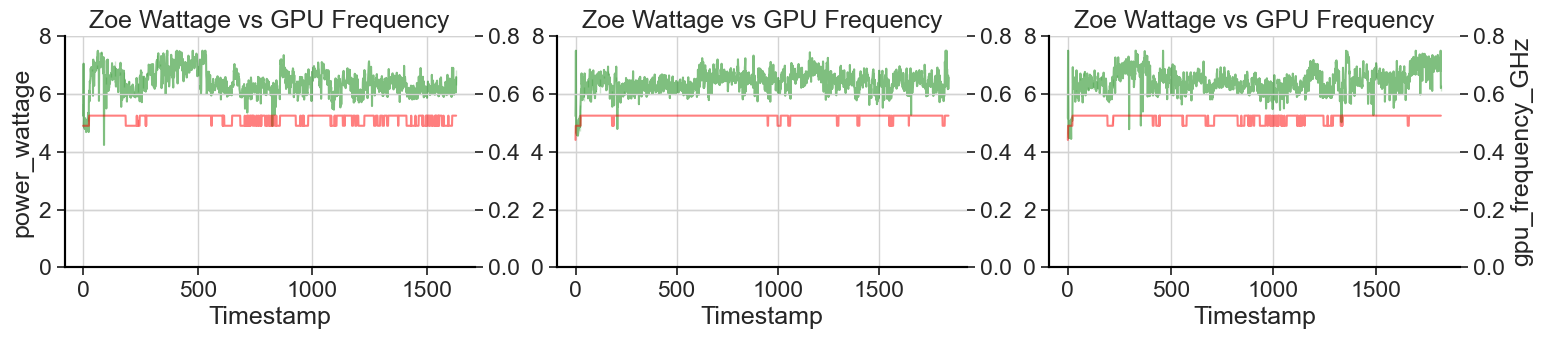

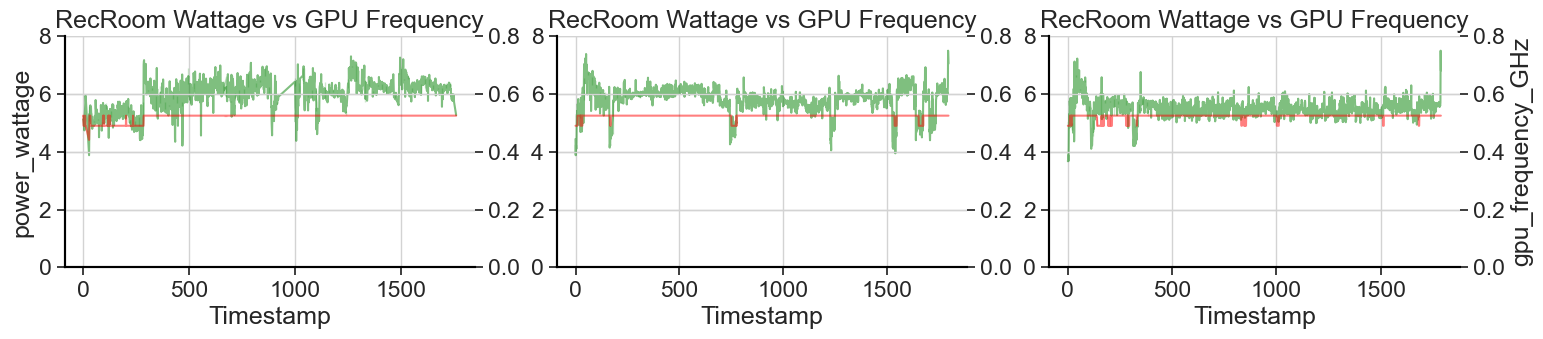

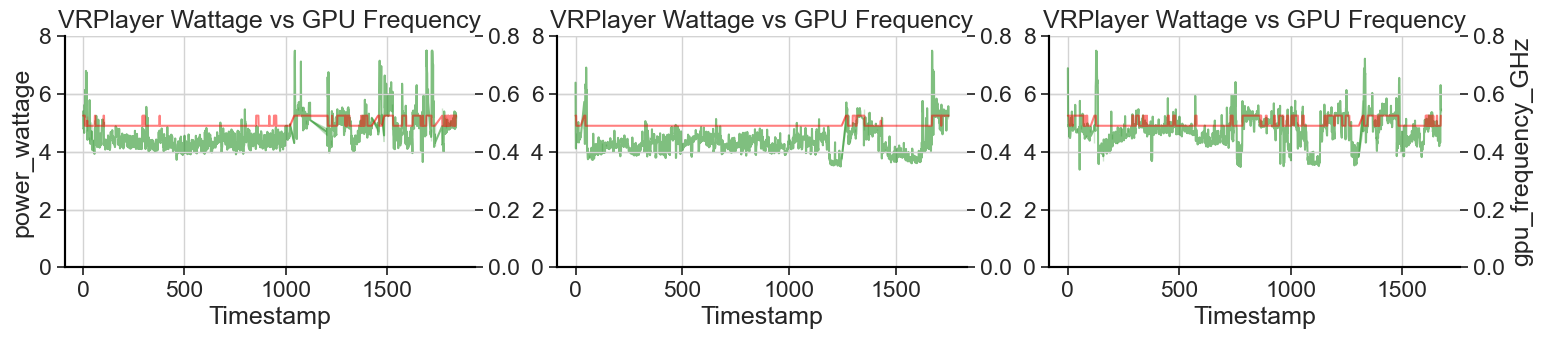

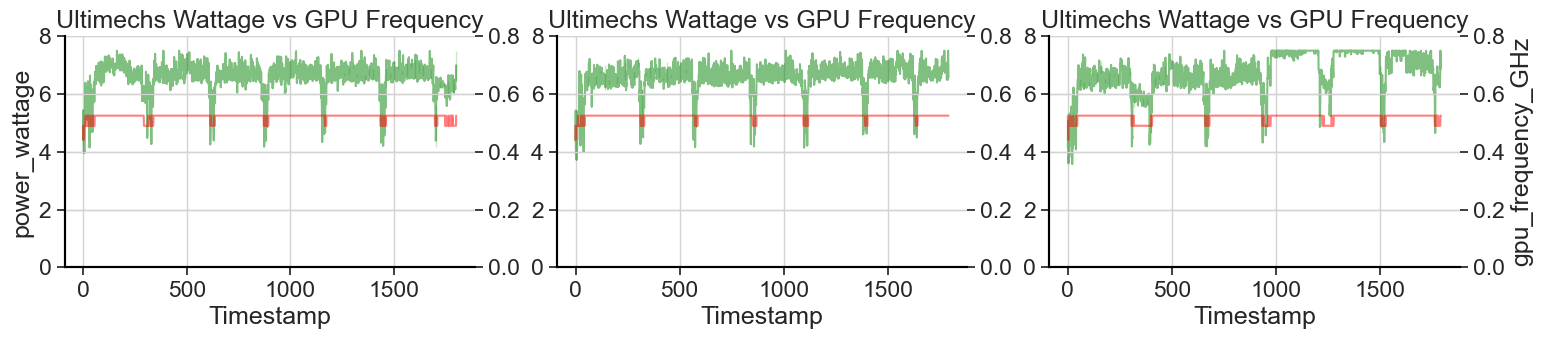

In [74]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'gpu_frequency_GHz', app, app + ' Wattage vs GPU Frequency', 0.8)


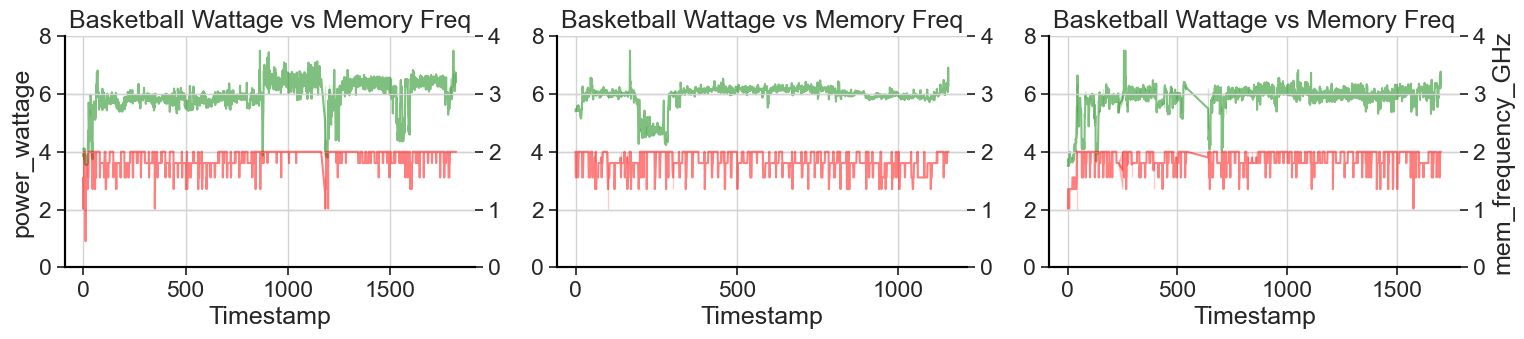

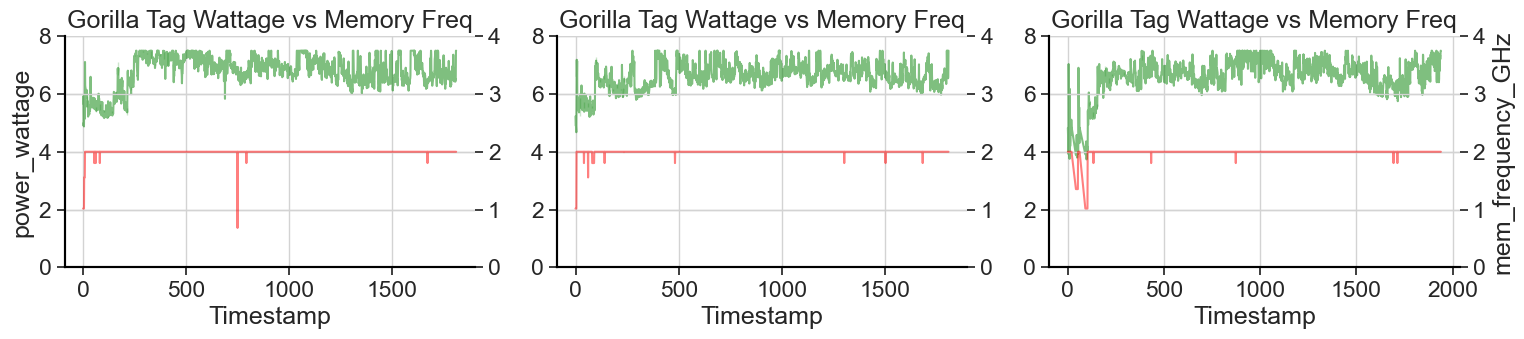

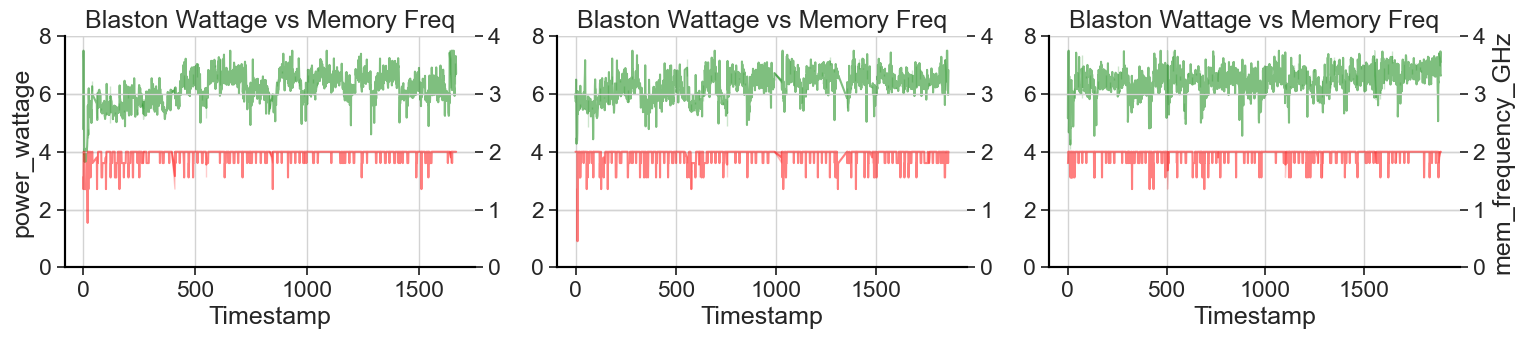

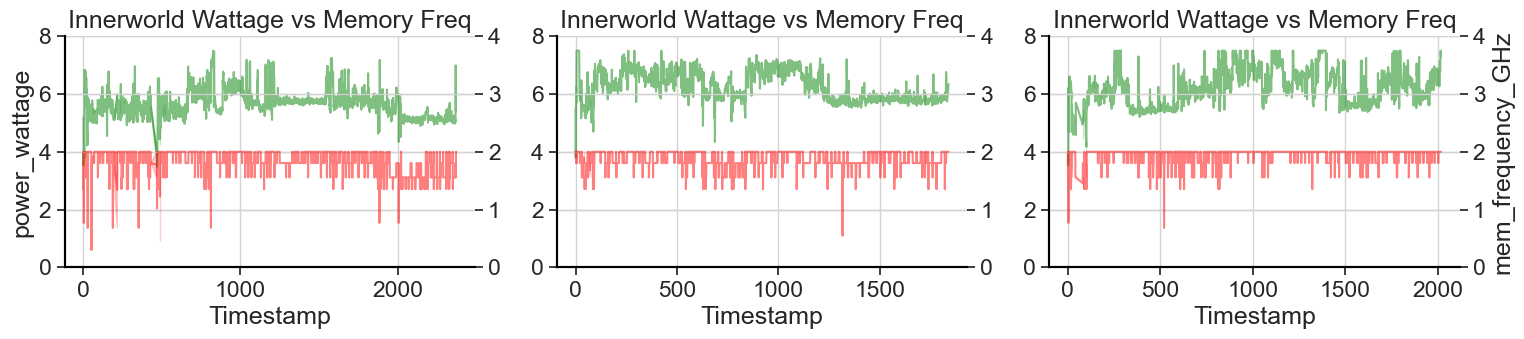

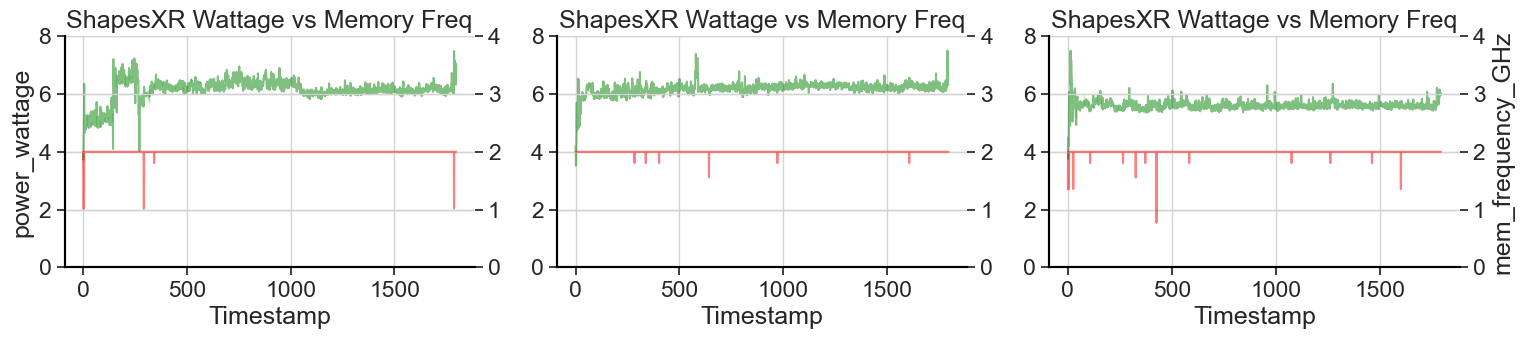

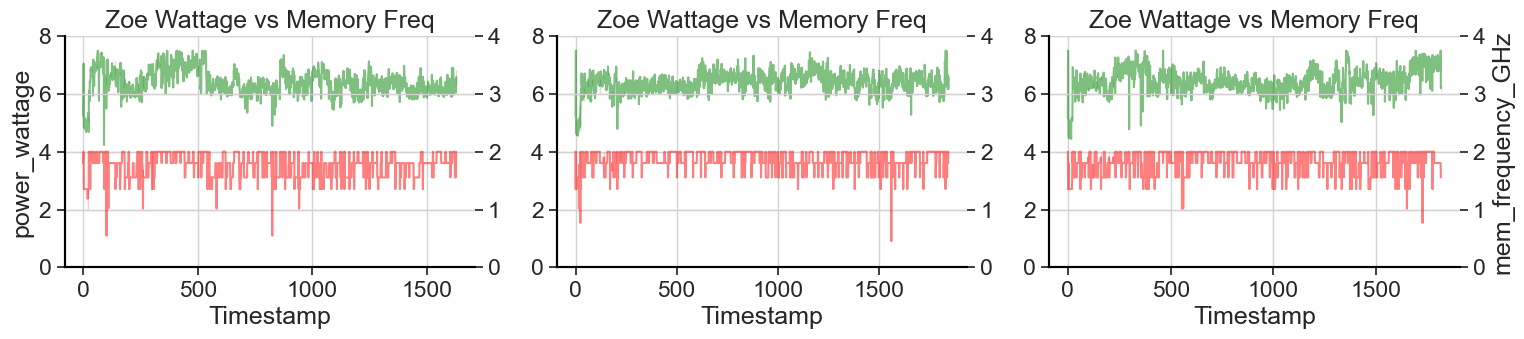

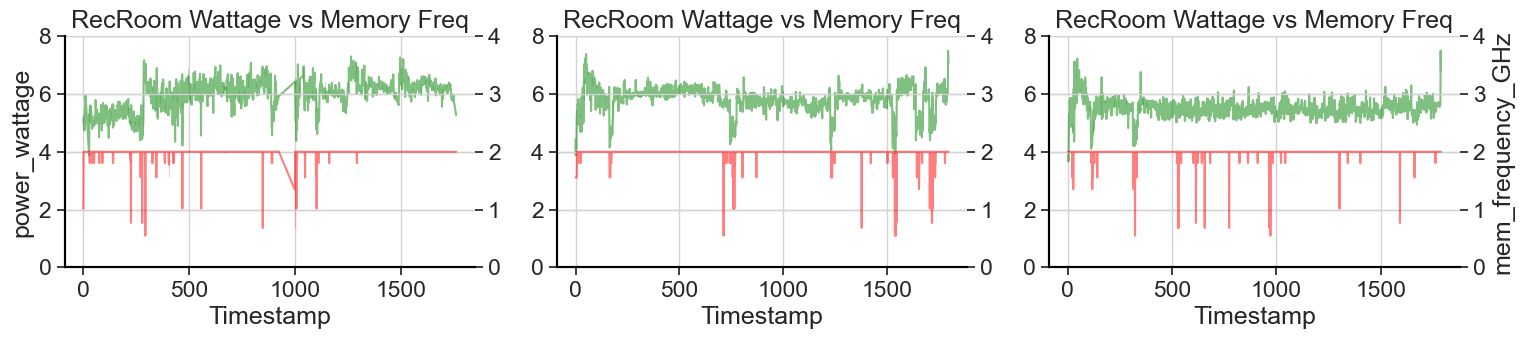

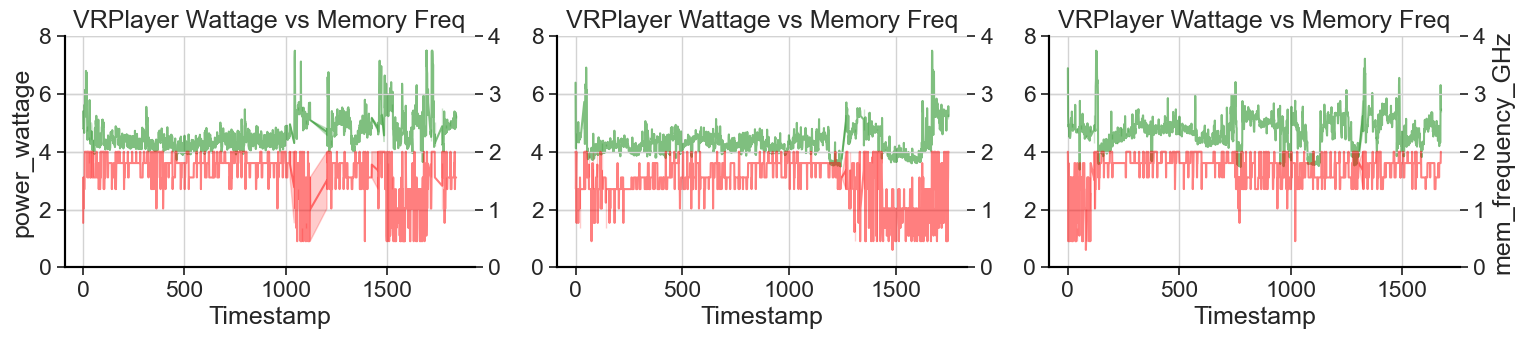

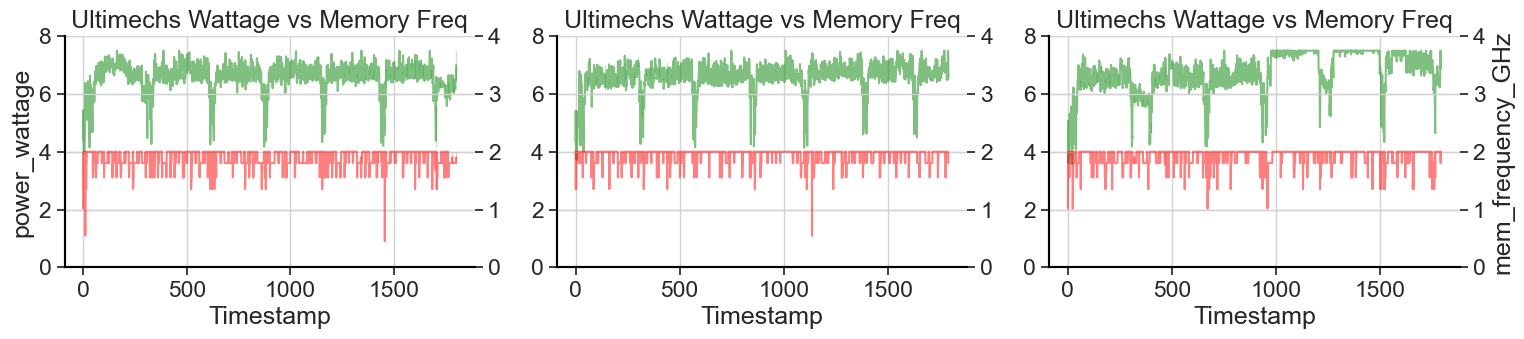

In [79]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'mem_frequency_GHz', app, app + ' Wattage vs Memory Freq', 4)


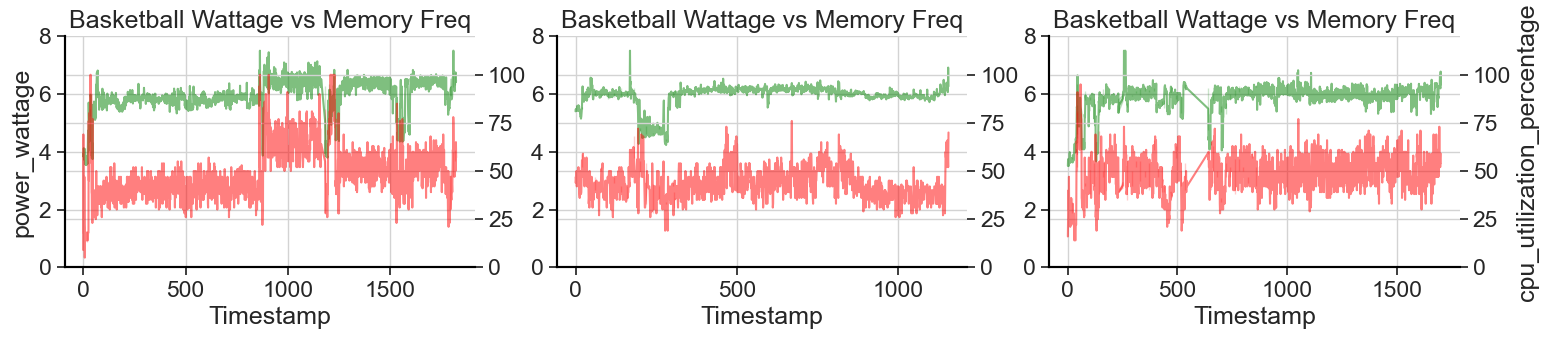

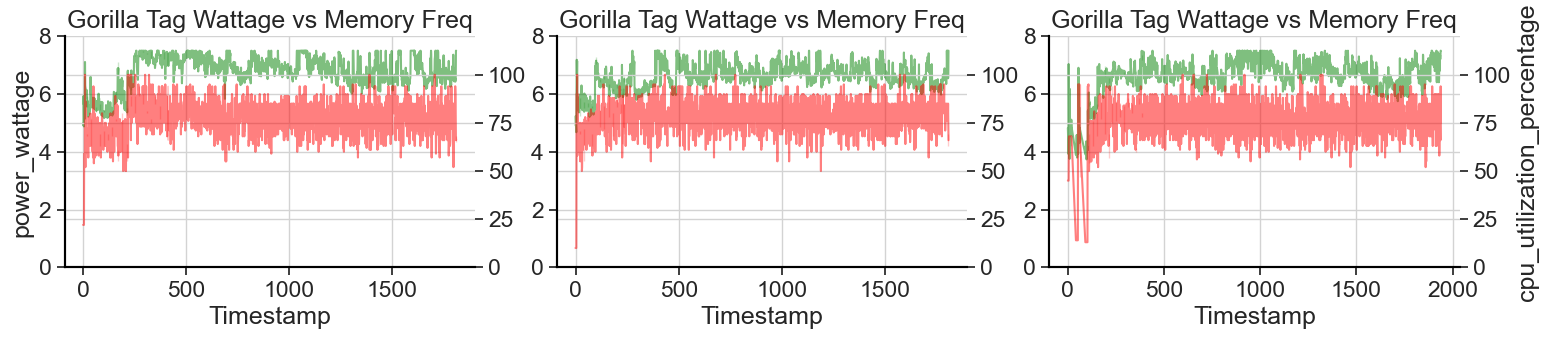

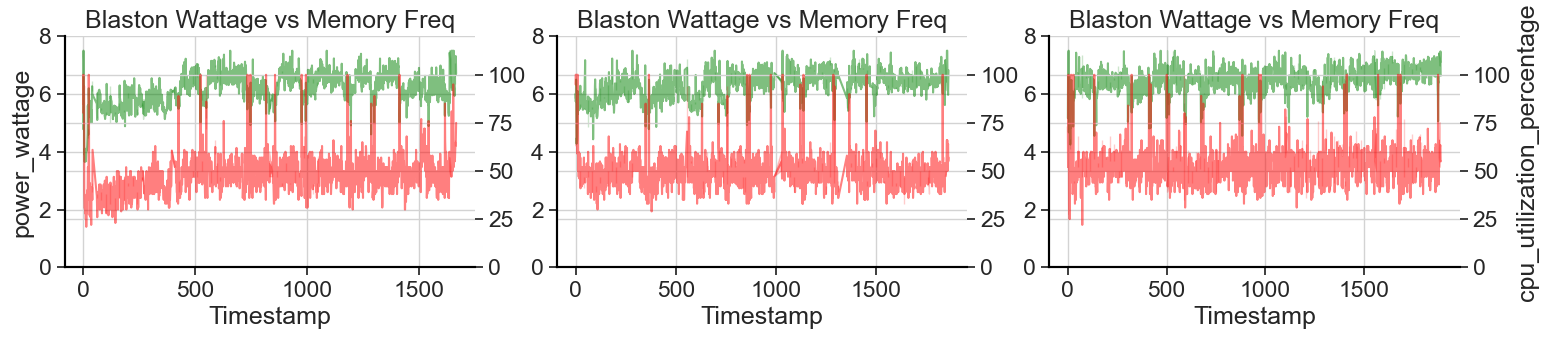

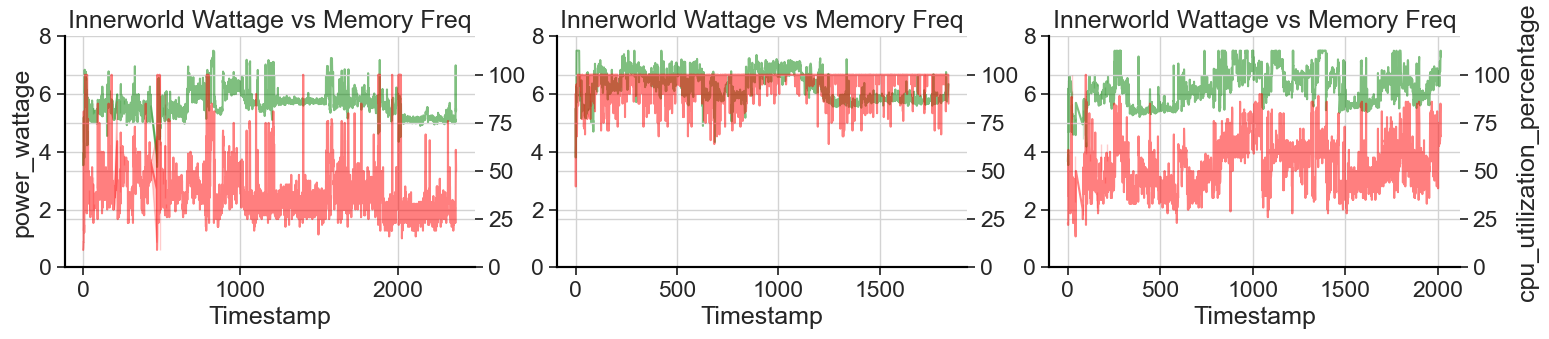

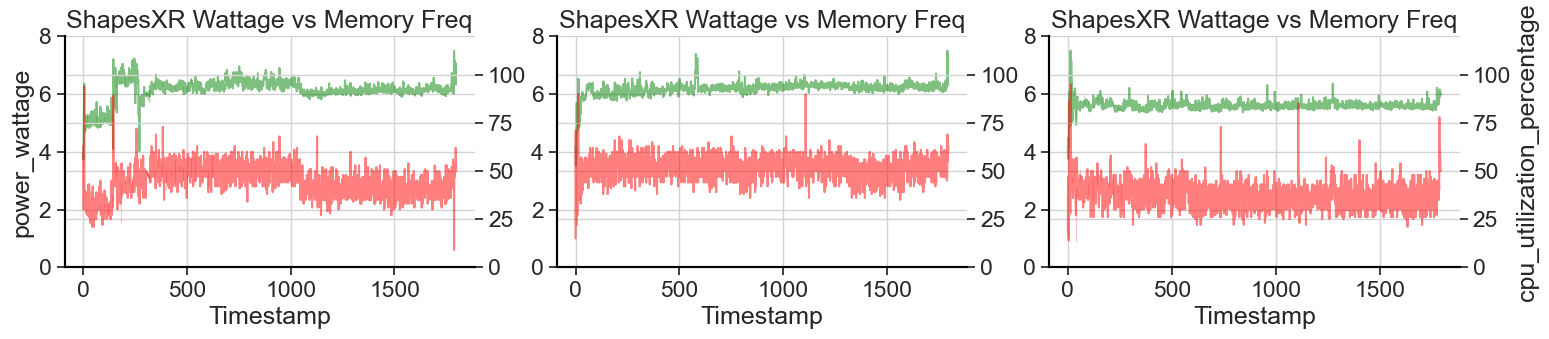

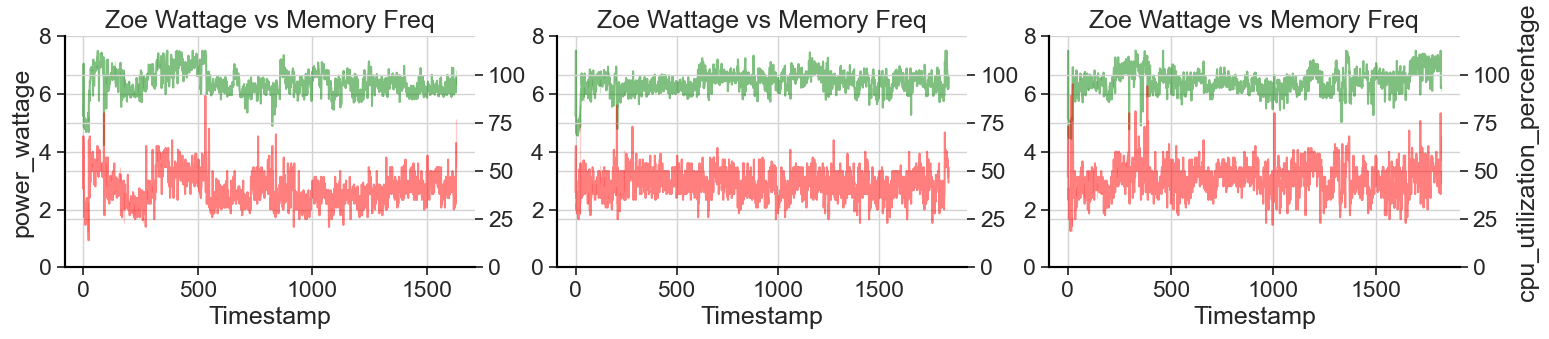

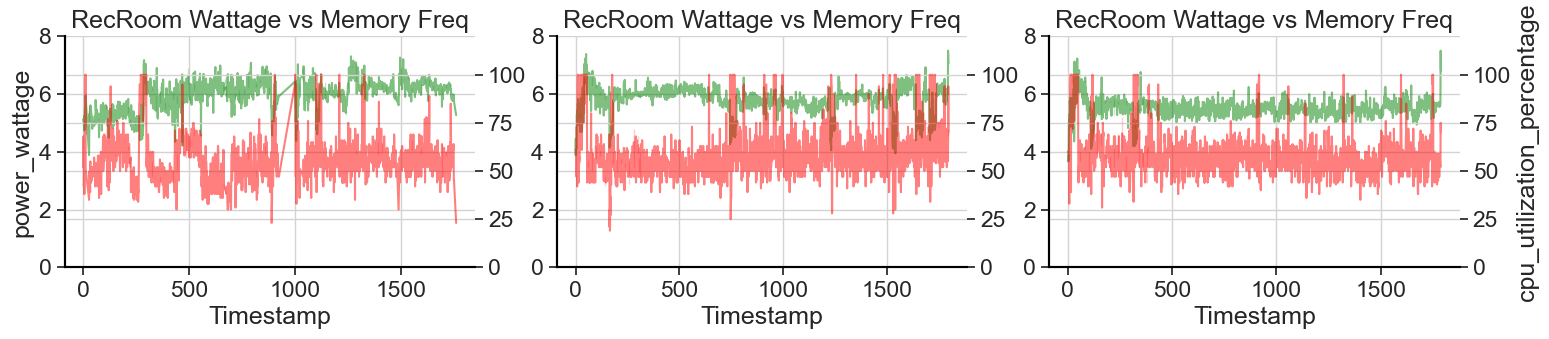

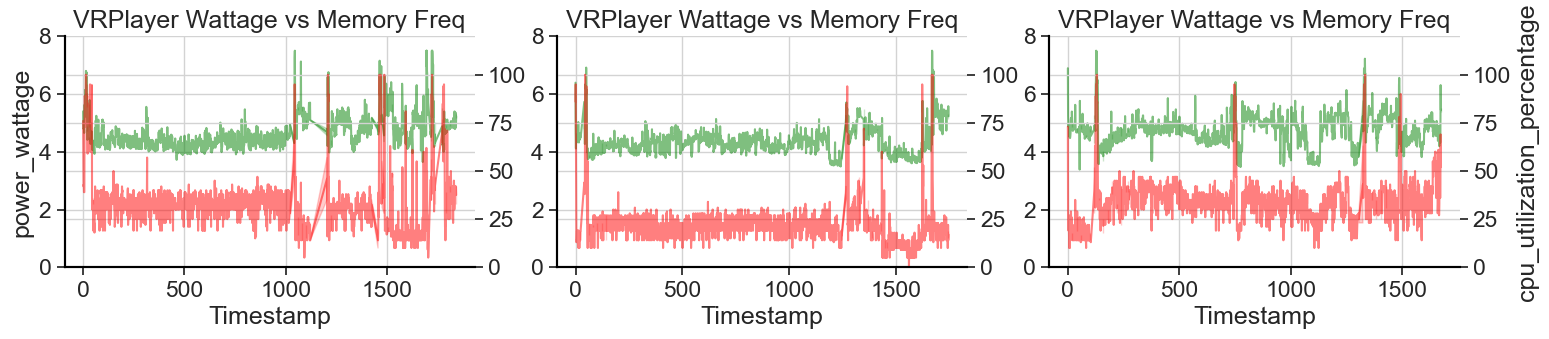

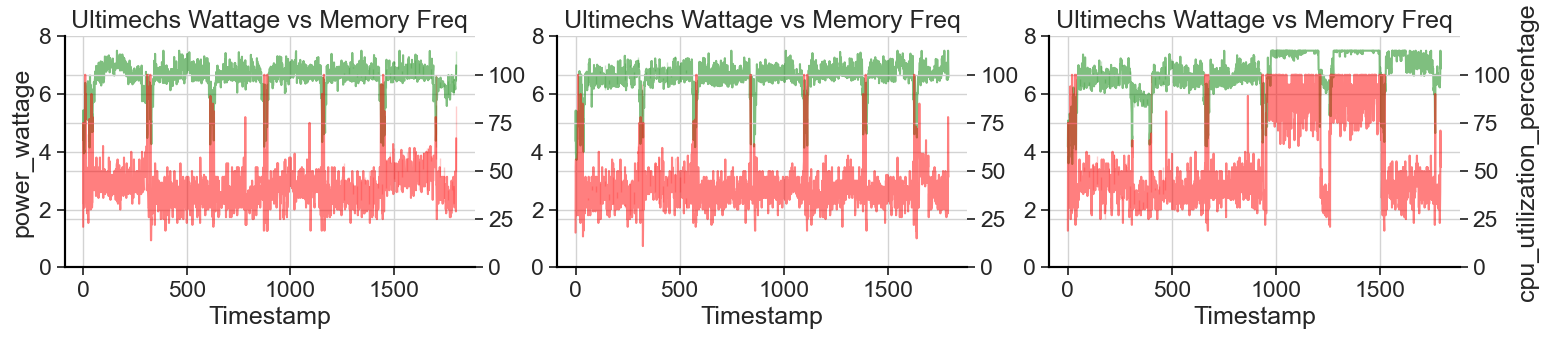

In [81]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'cpu_utilization_percentage', app, app + ' Wattage vs CPU Util', 10)


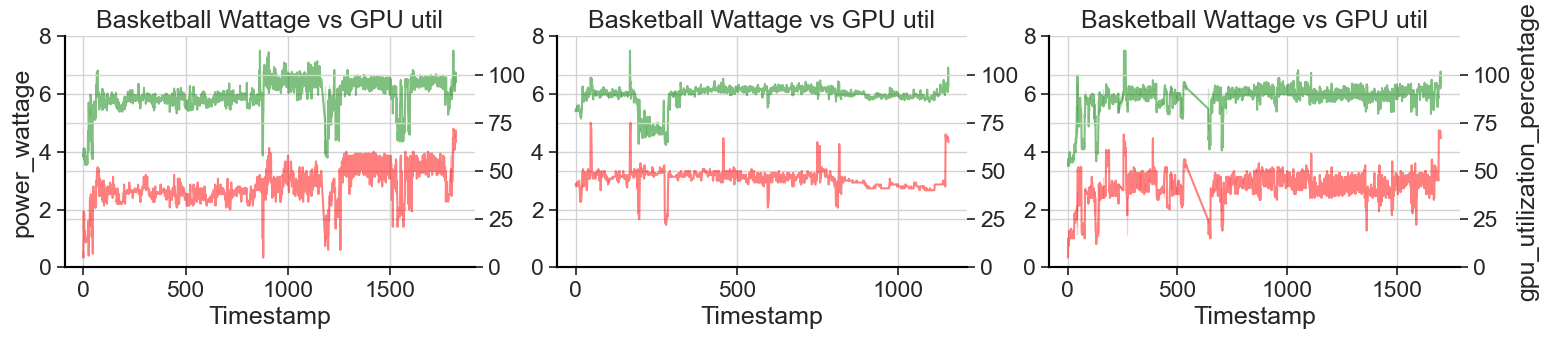

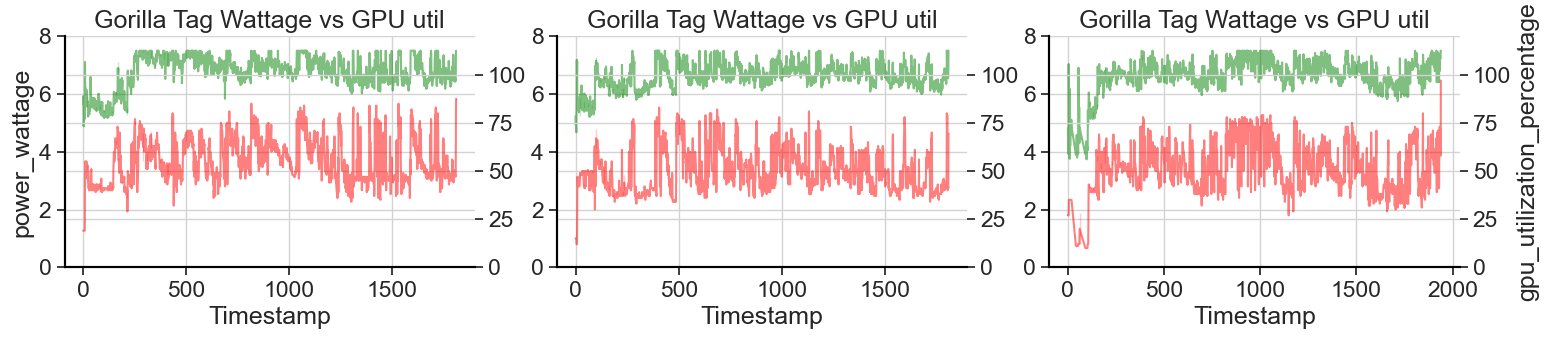

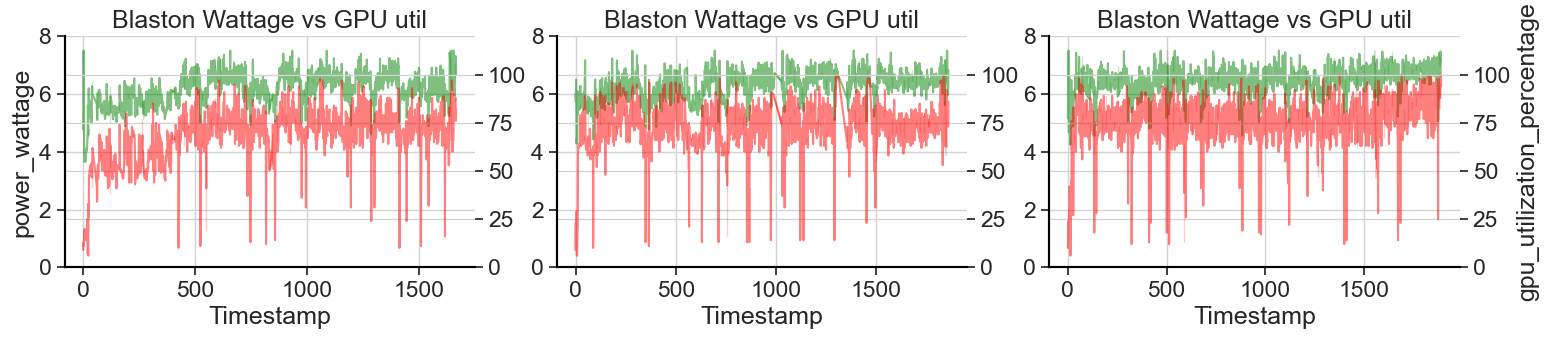

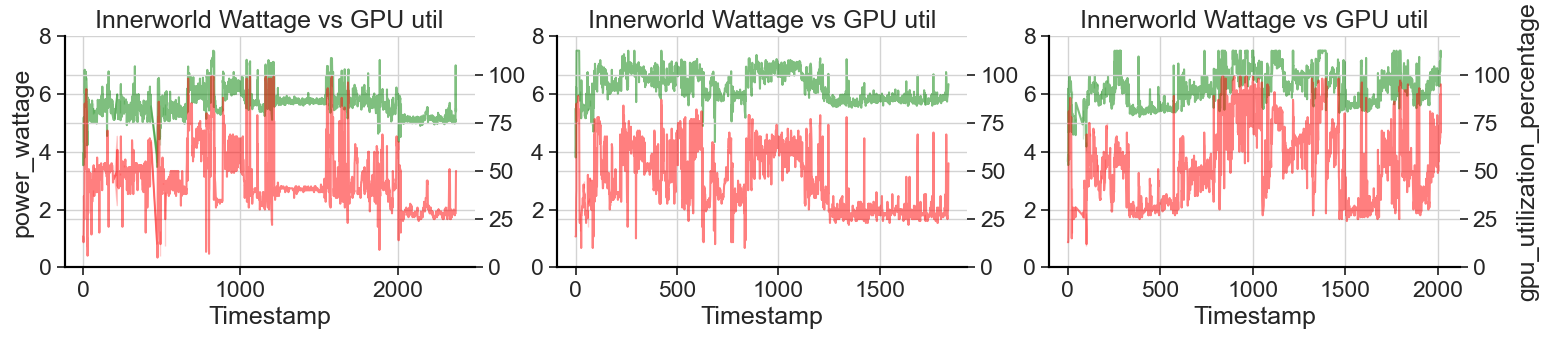

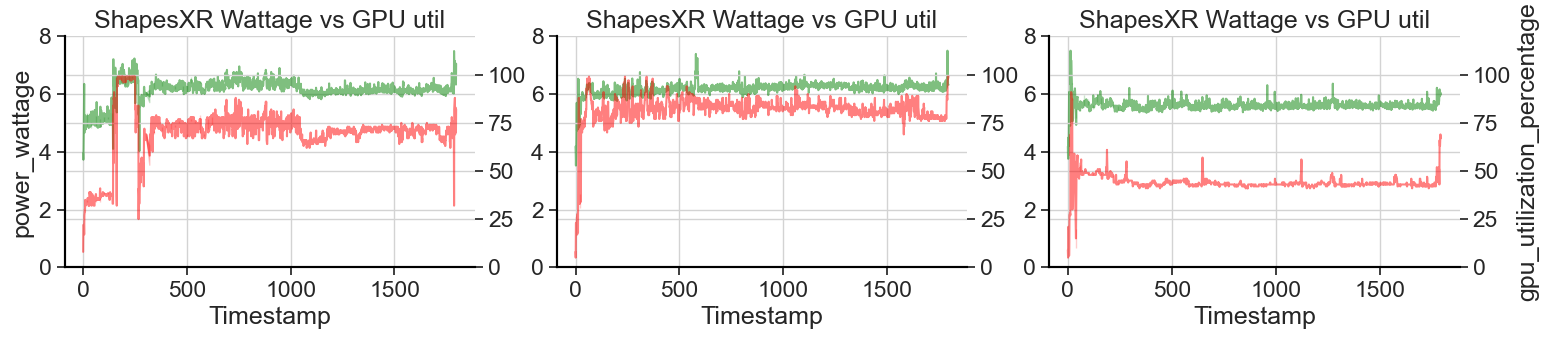

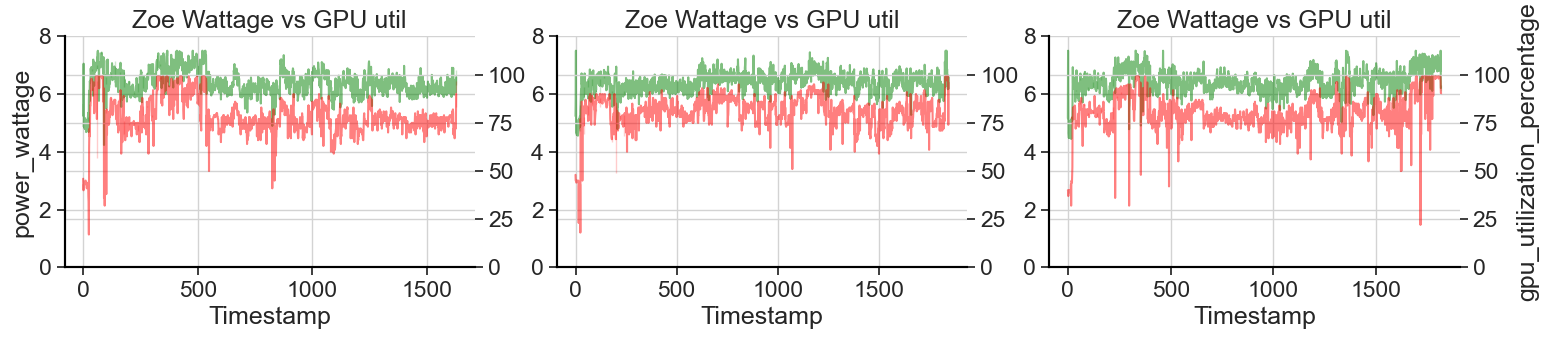

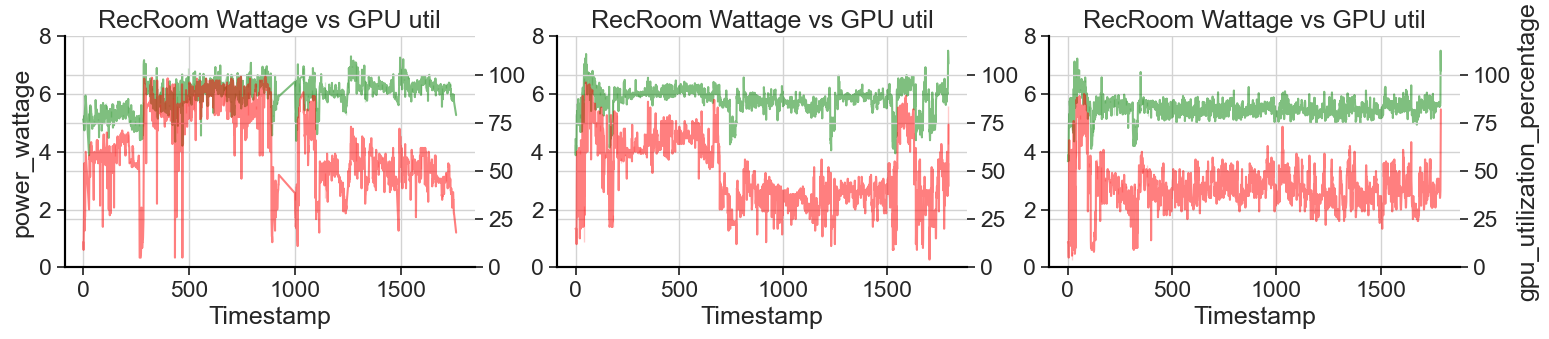

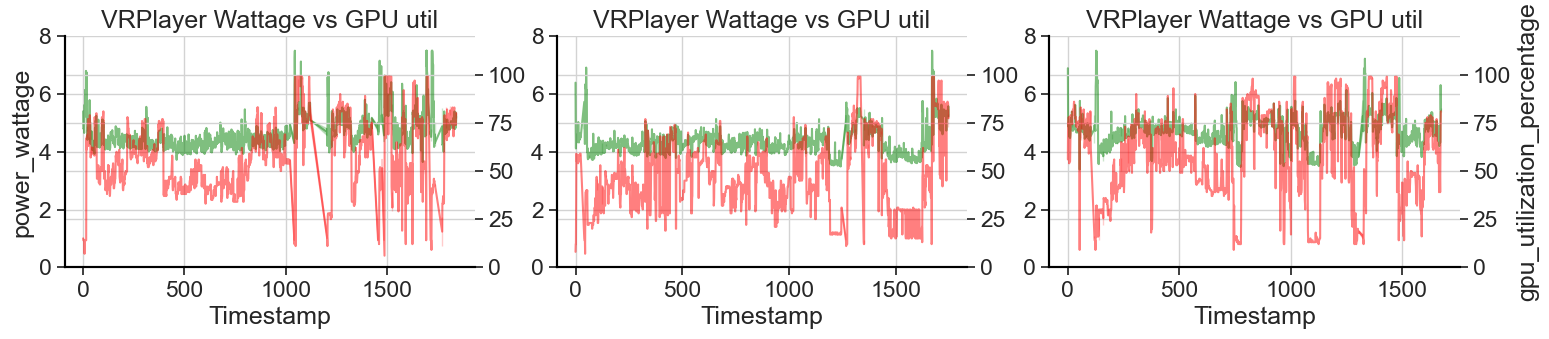

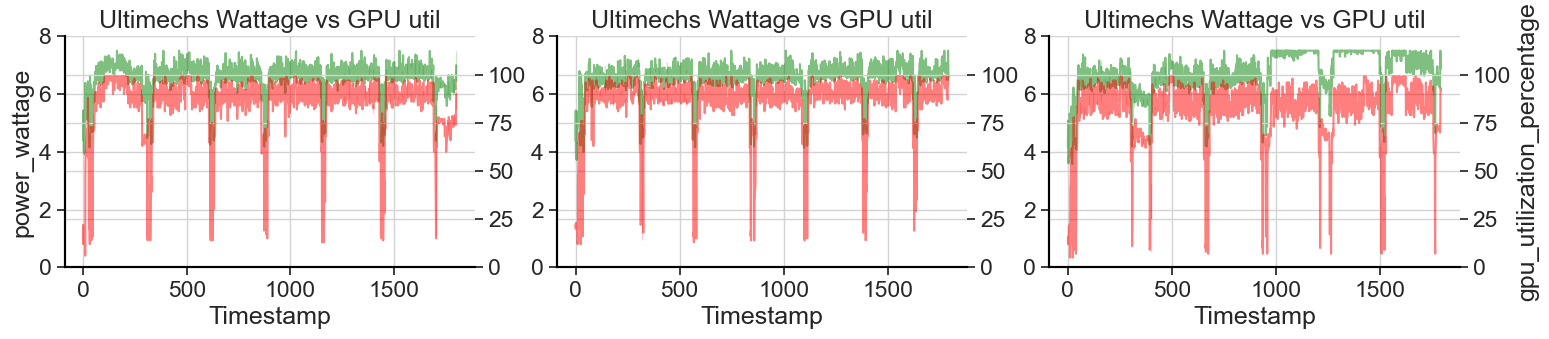

In [82]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'gpu_utilization_percentage', app, app + ' Wattage vs GPU Util', 120)

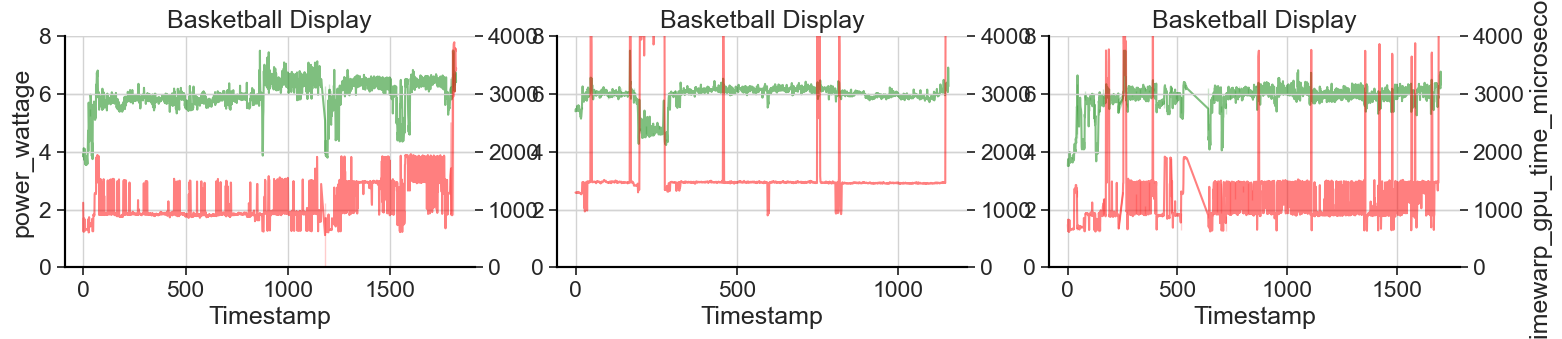

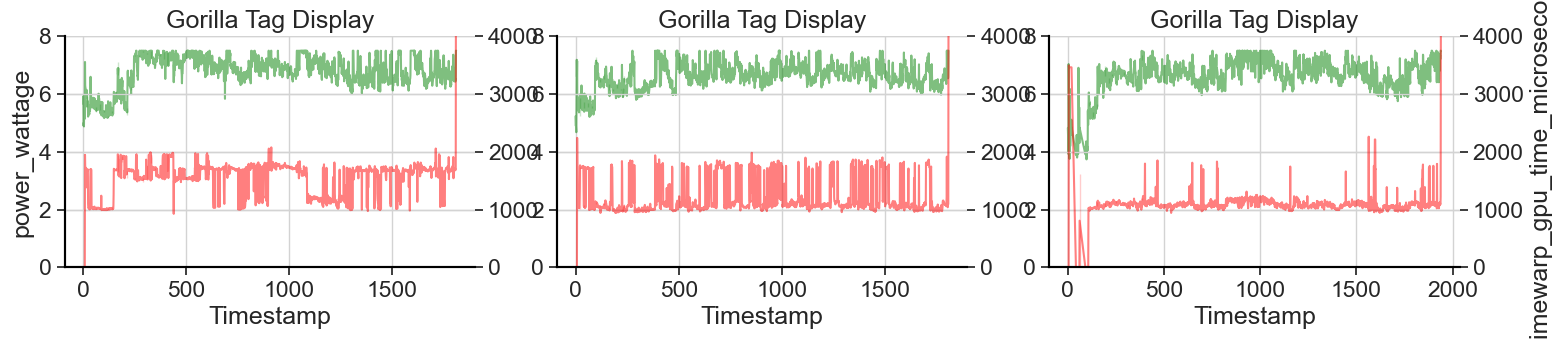

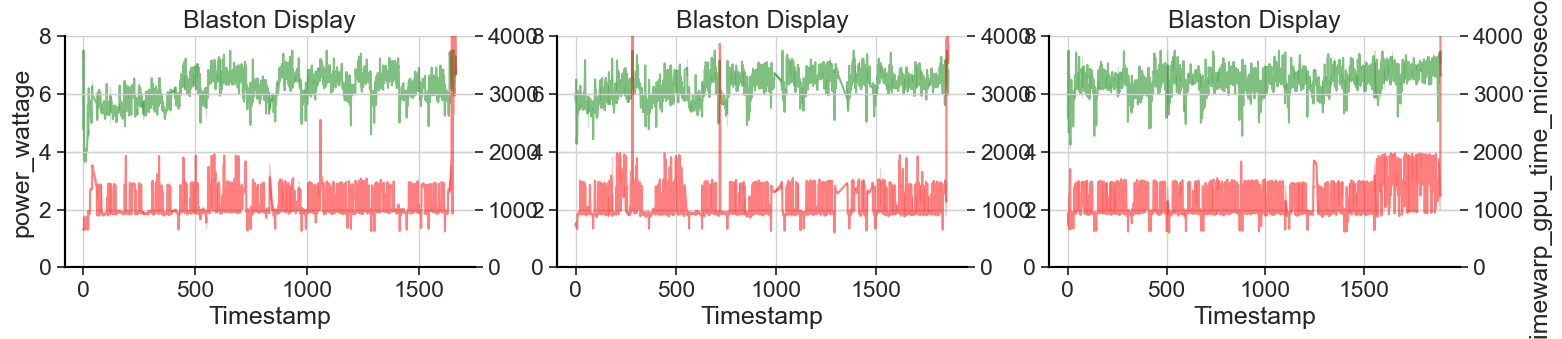

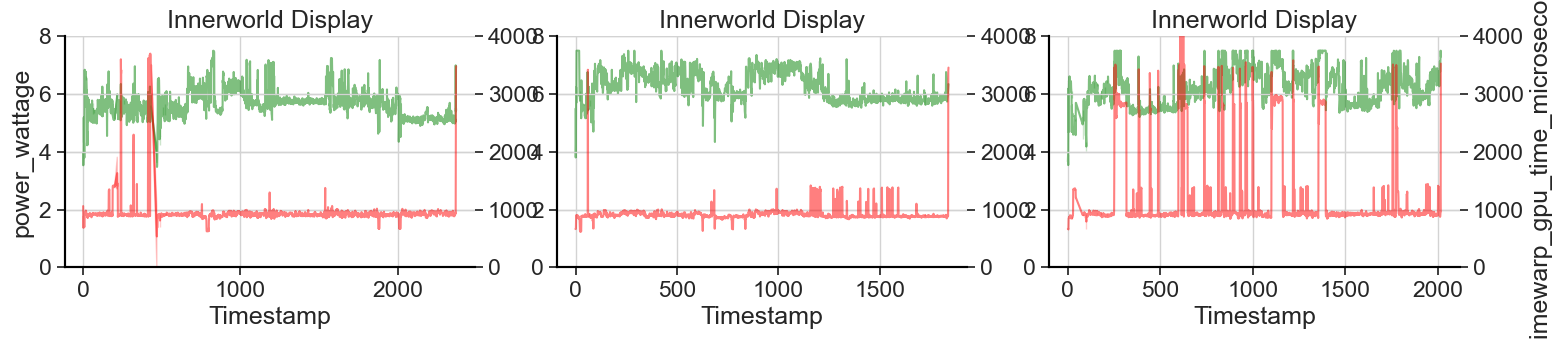

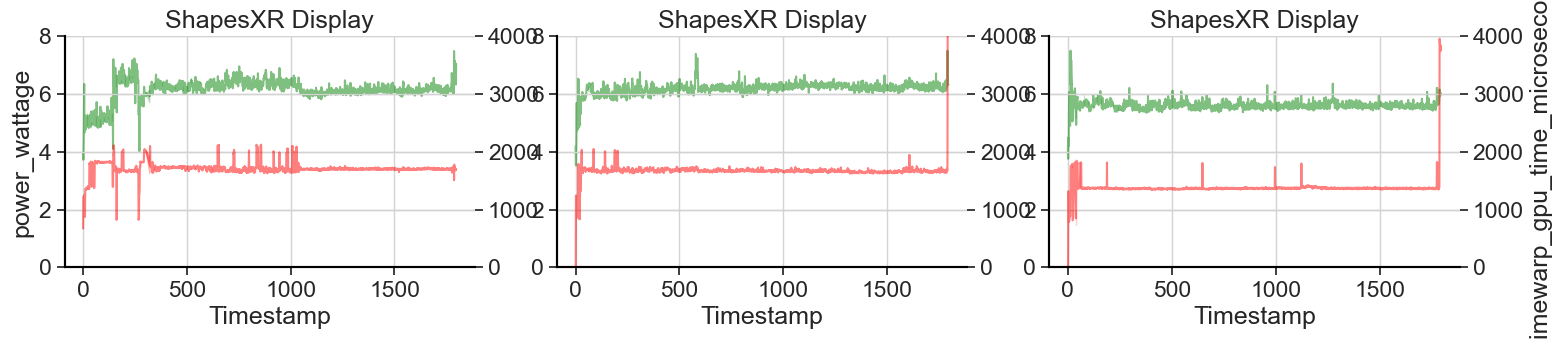

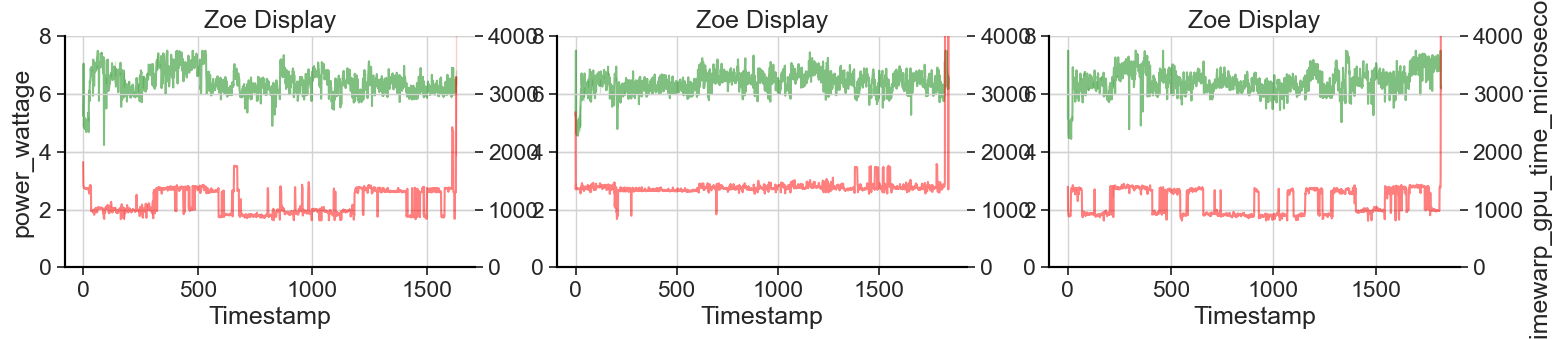

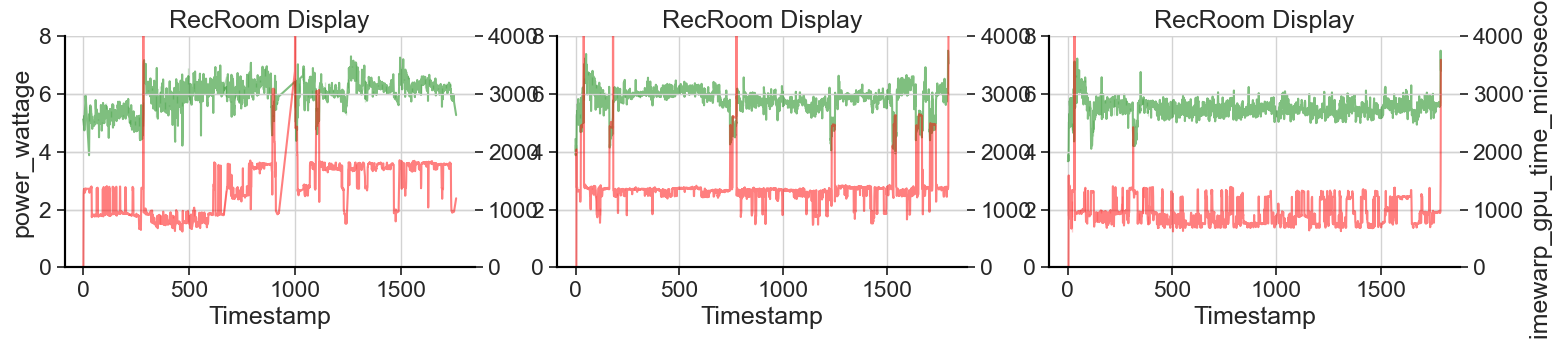

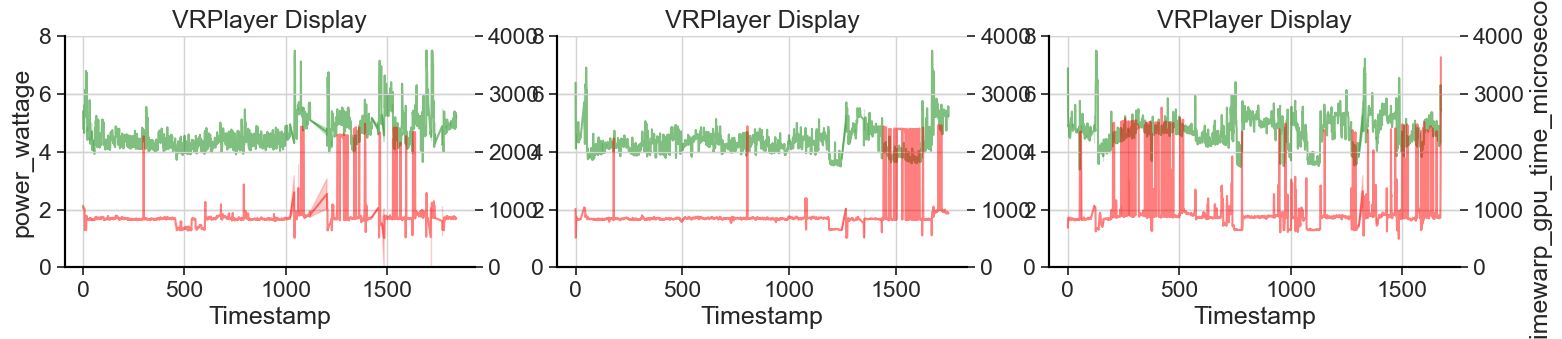

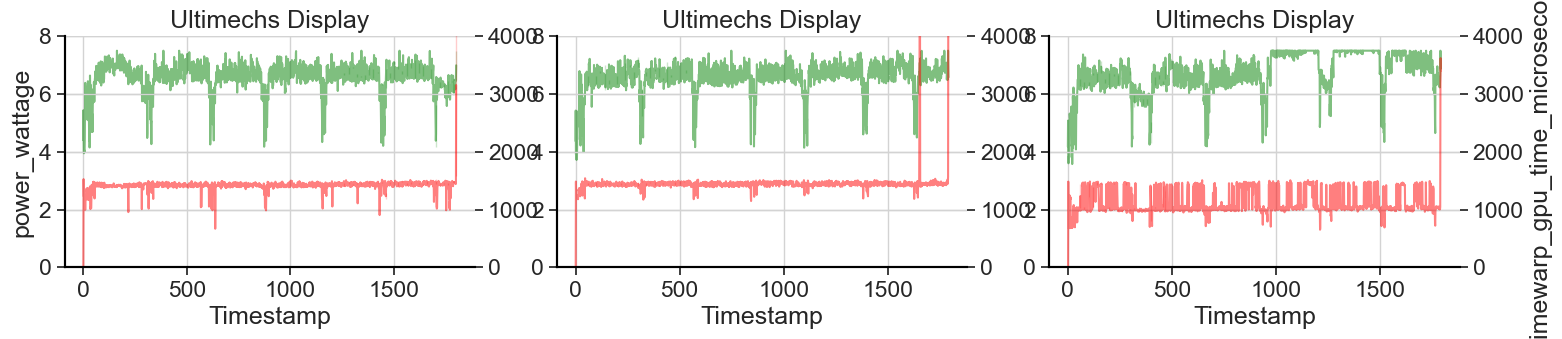

In [84]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'timewarp_gpu_time_microseconds', app, app + ' Display', 4000)


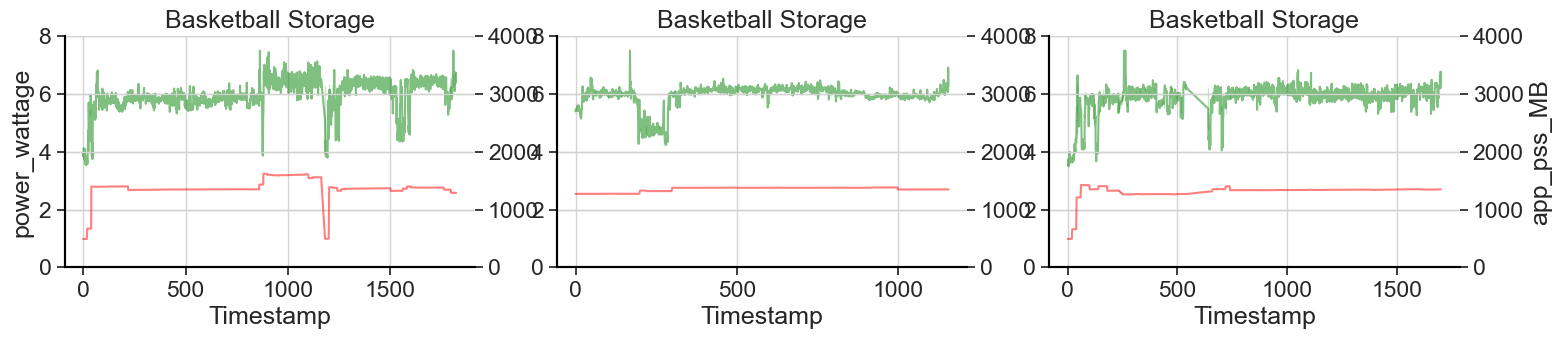

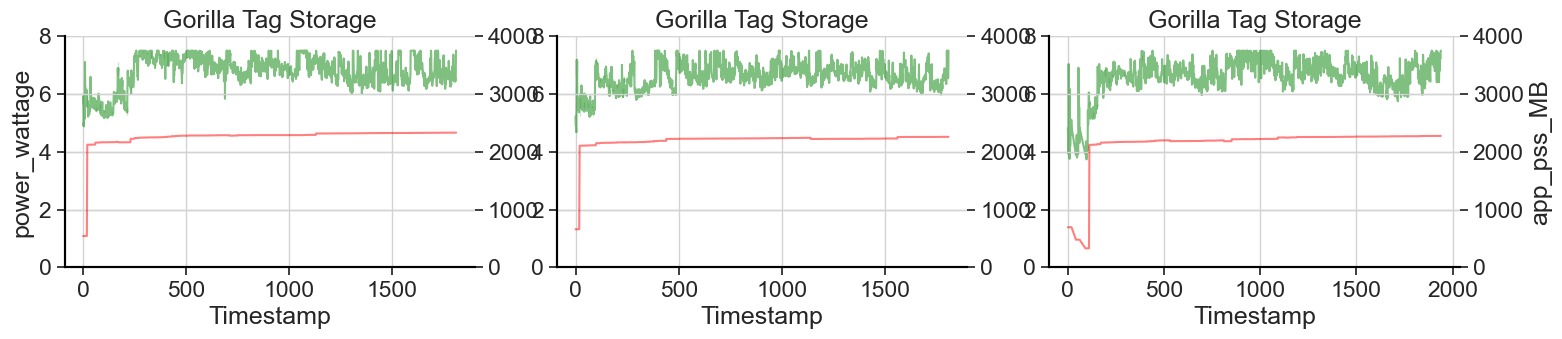

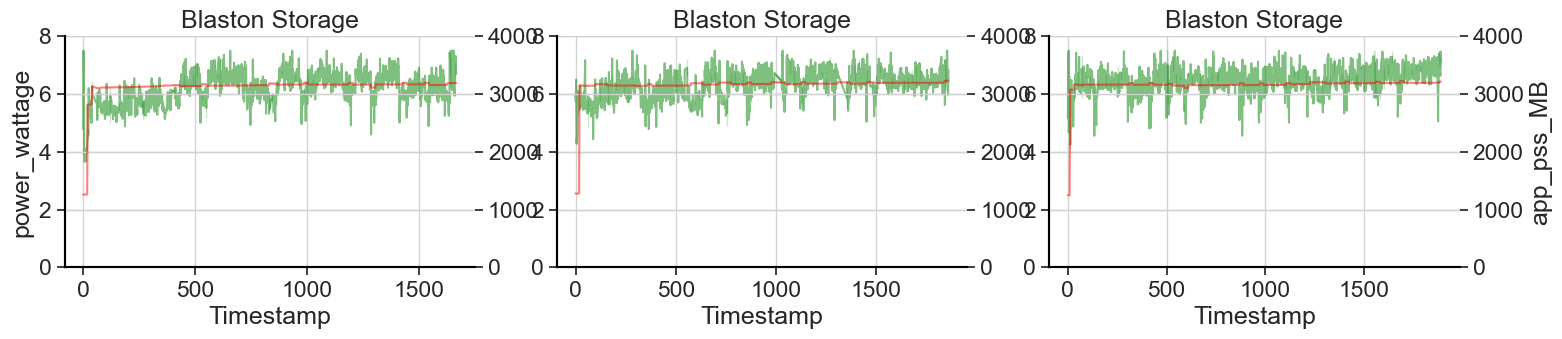

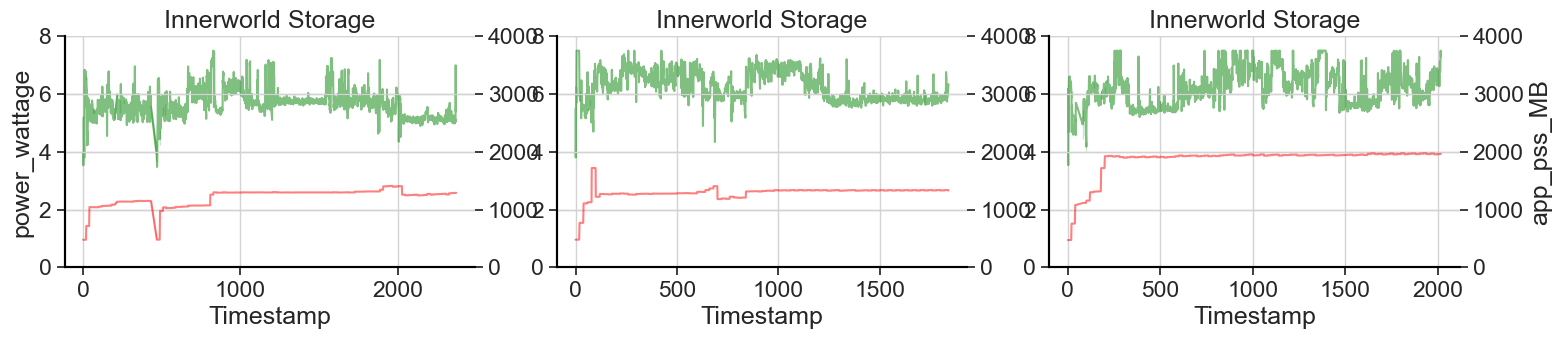

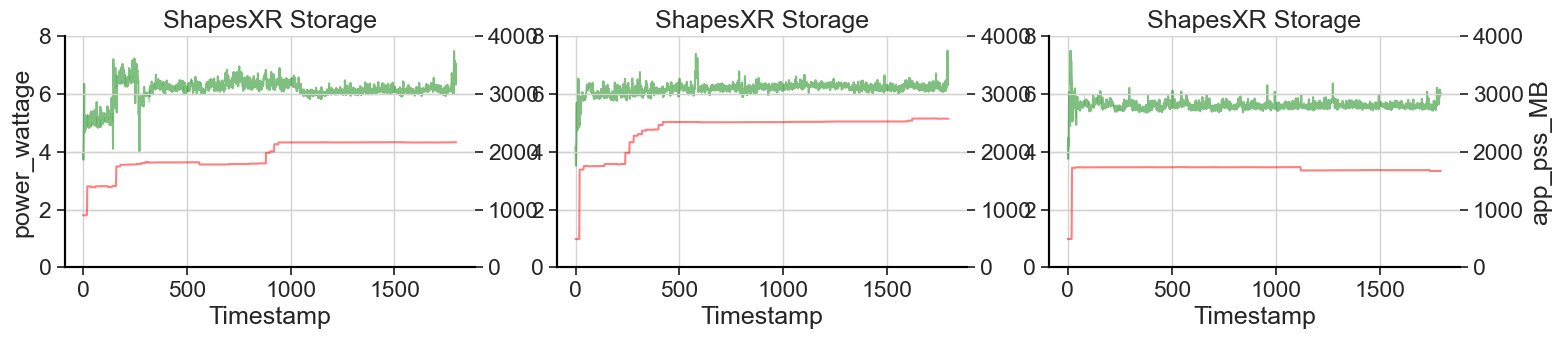

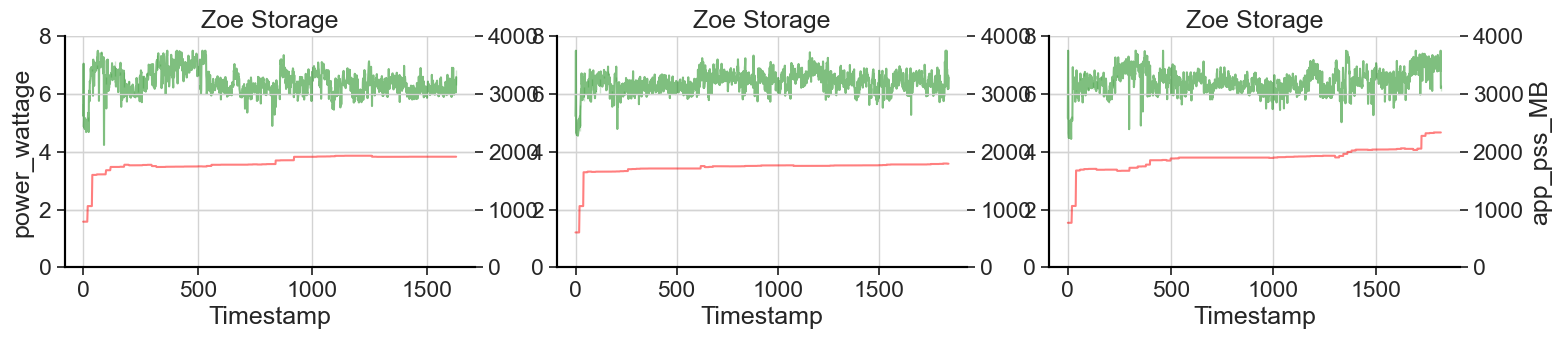

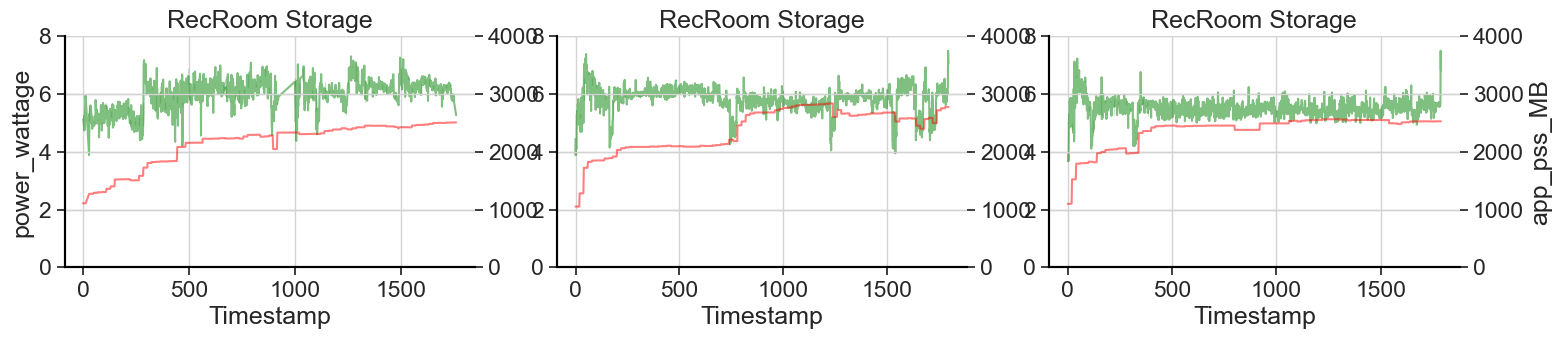

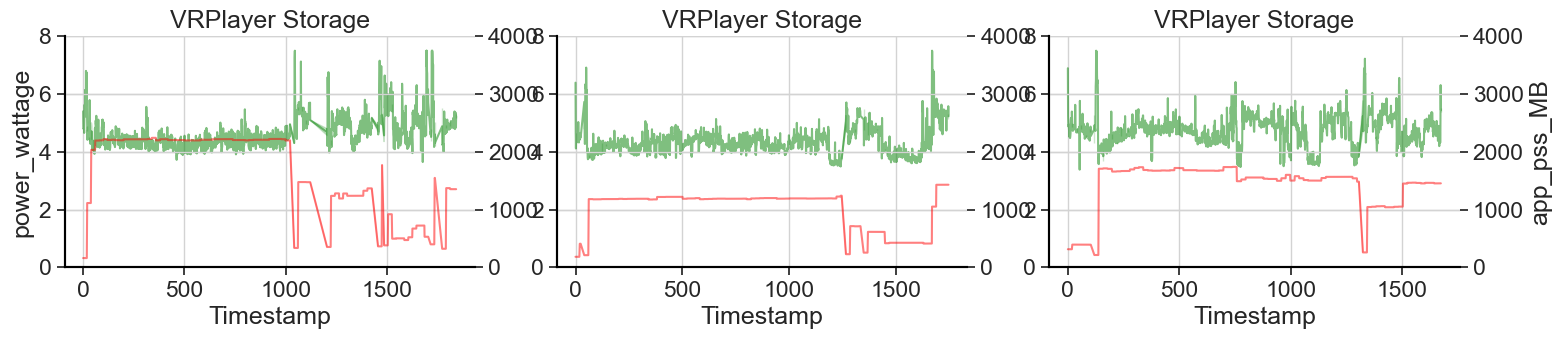

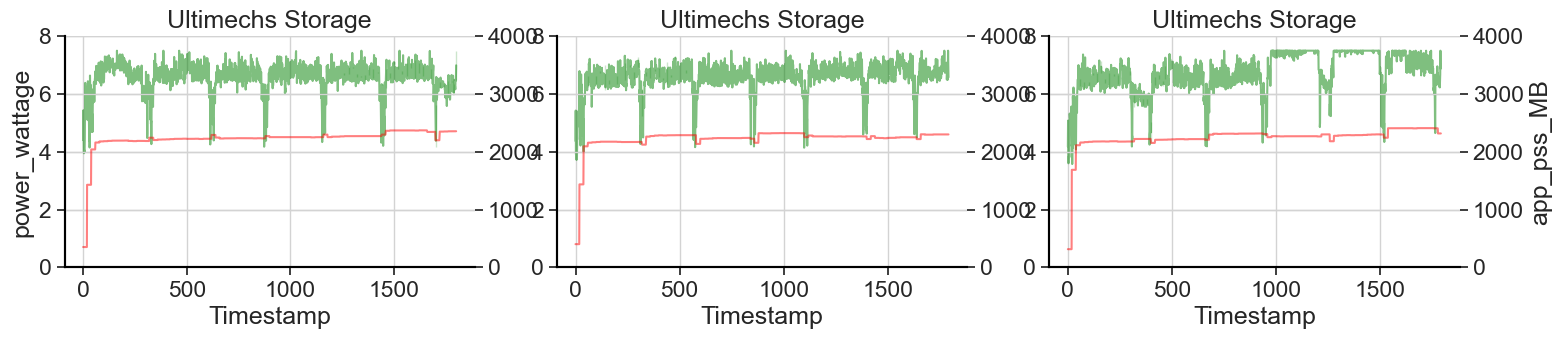

In [89]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'app_pss_MB', app, app + ' Storage', 4000)


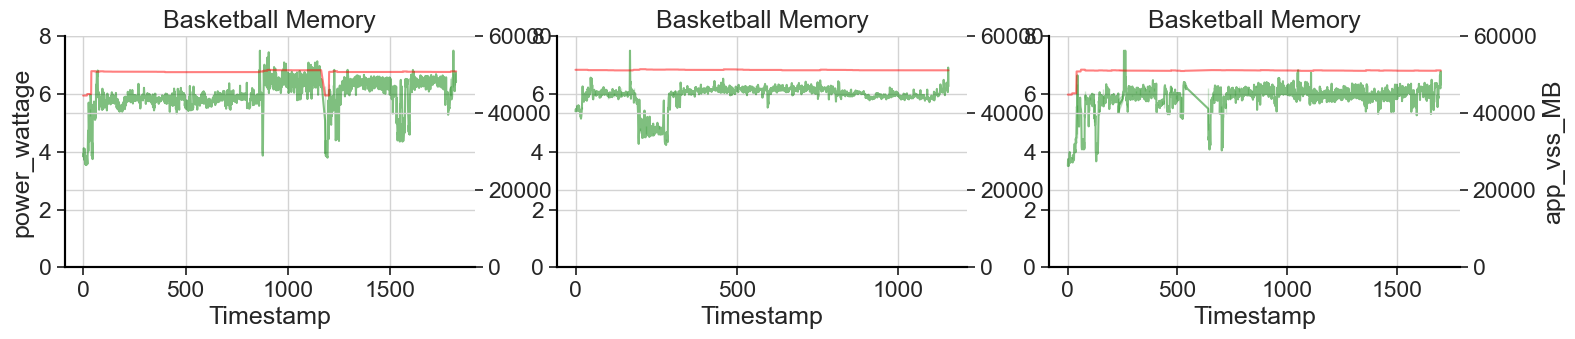

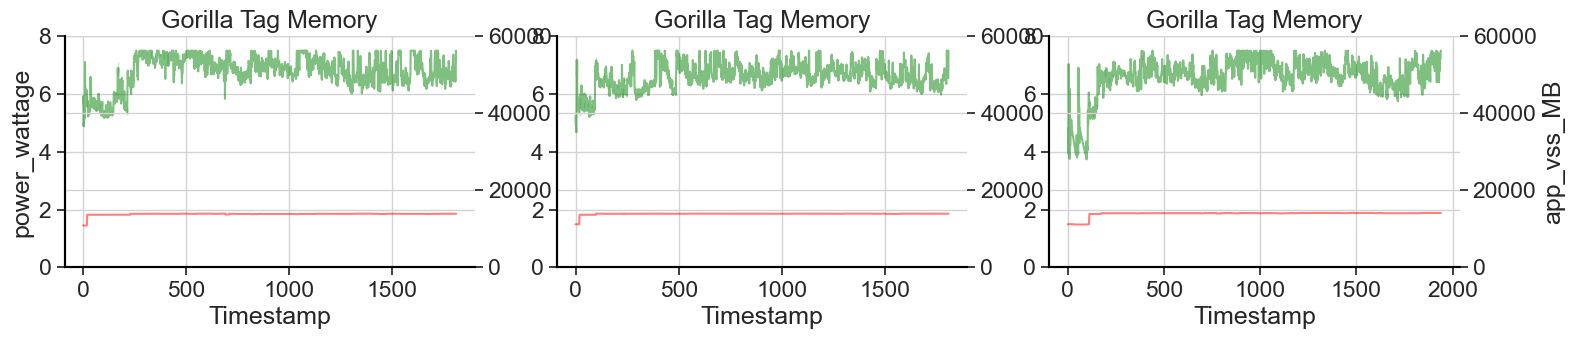

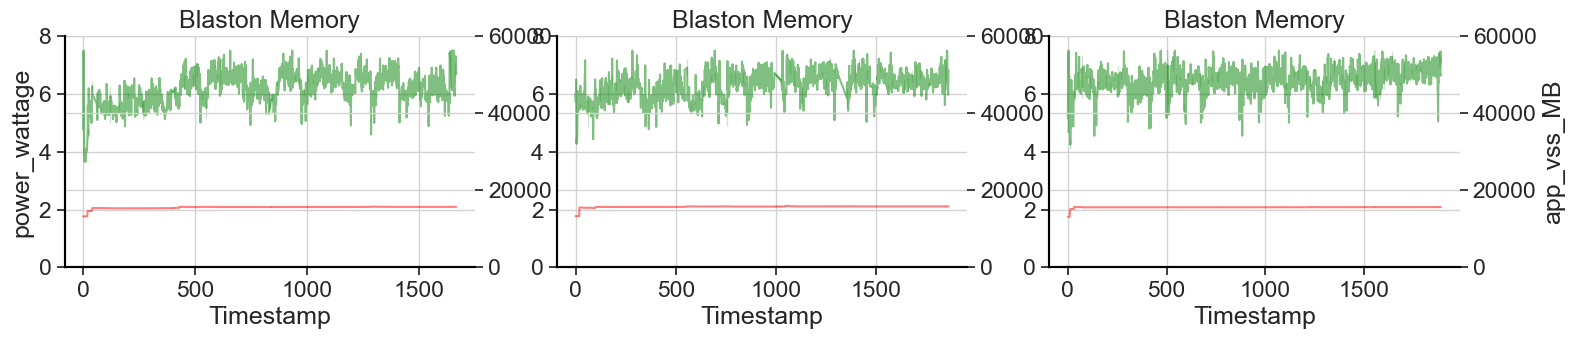

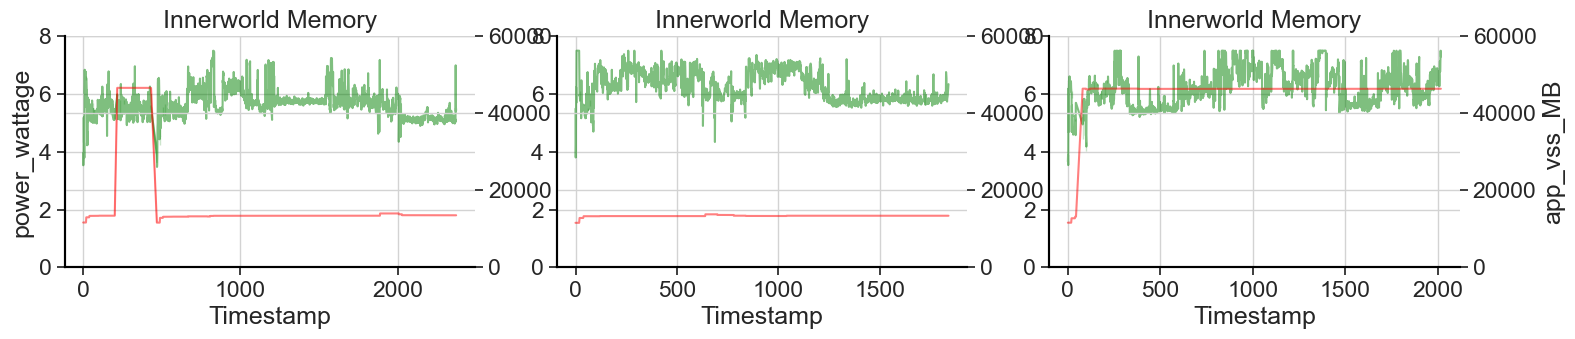

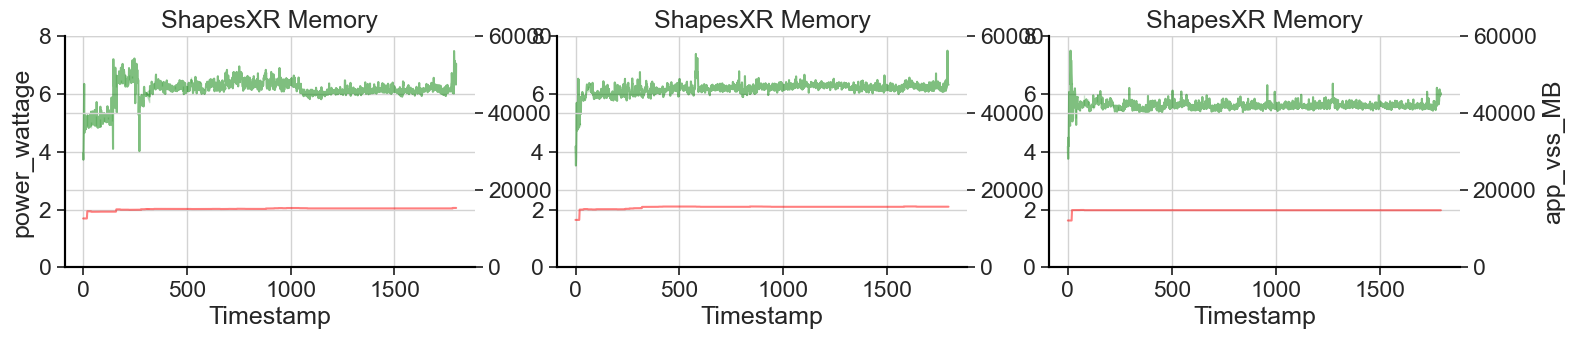

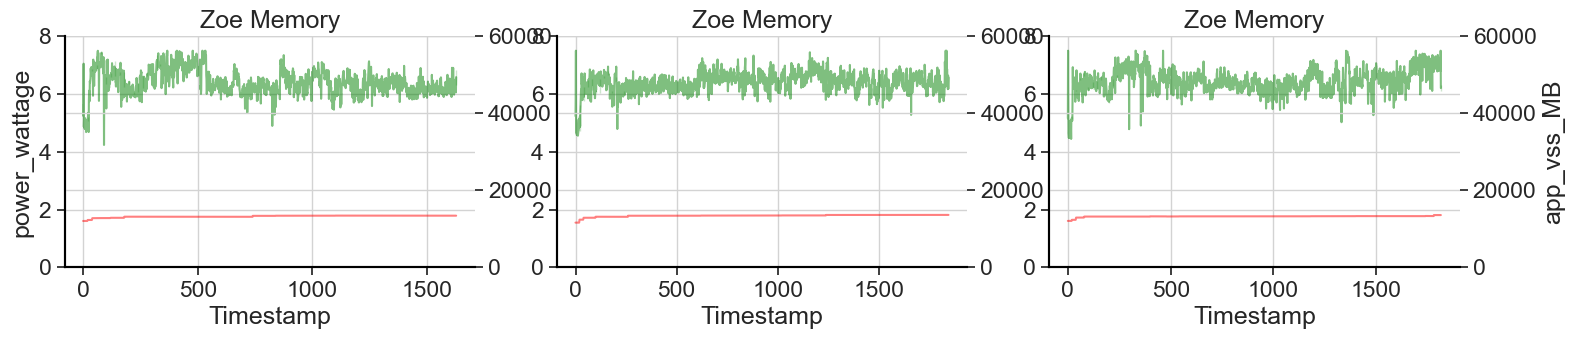

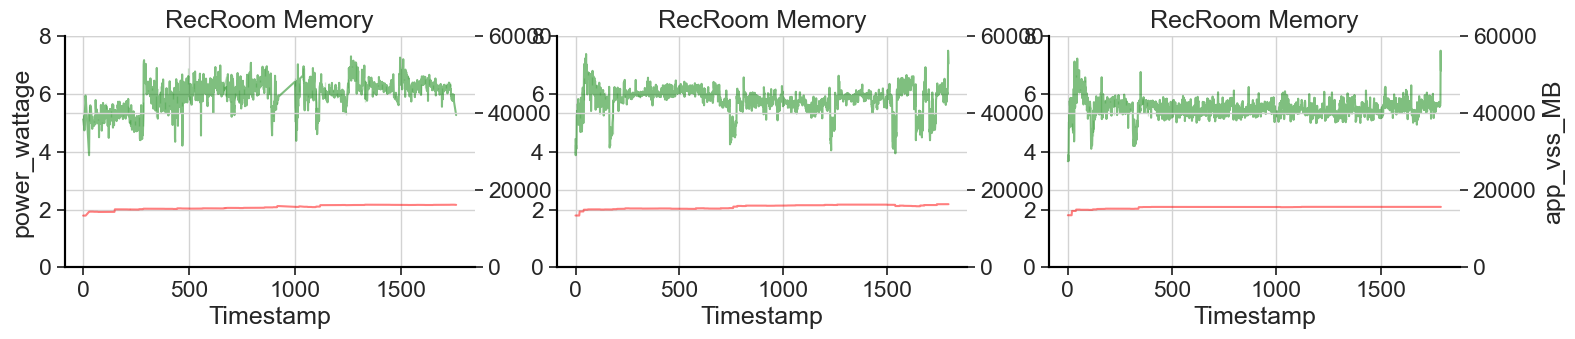

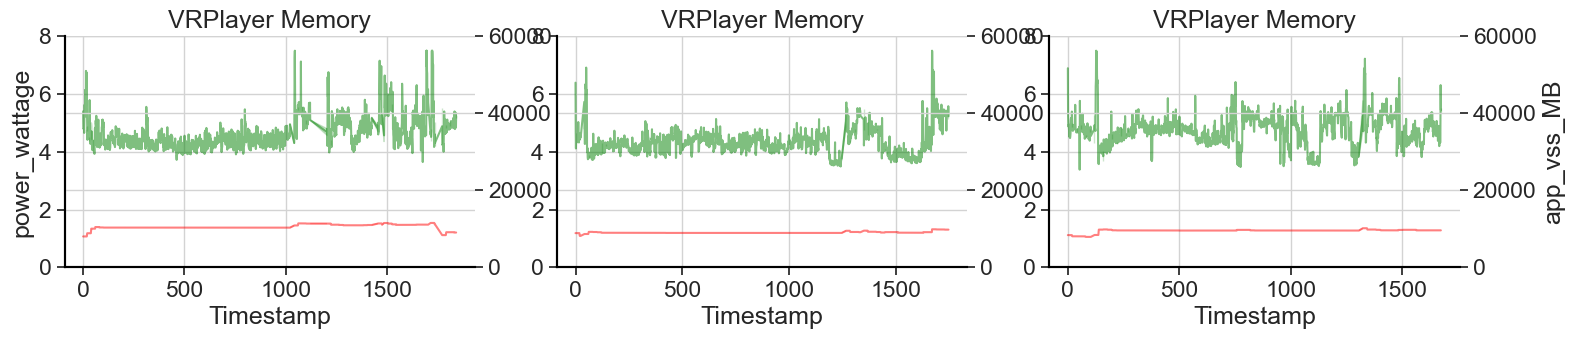

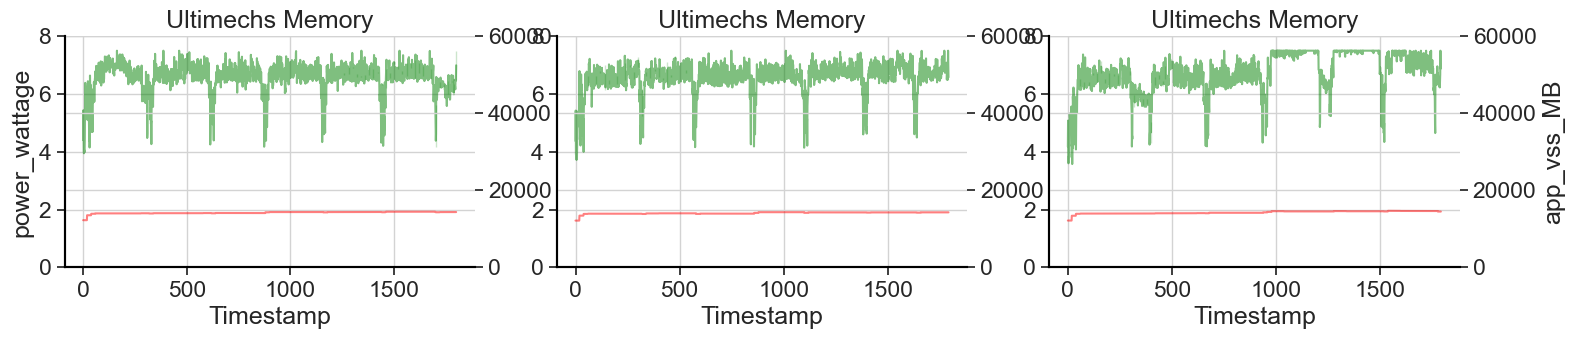

In [86]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'app_vss_MB', app, app + ' Memory', 60000)
